In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
A=pd.read_excel("/content/A.xlsx")
B=pd.read_excel("/content/B.xlsx")
C=pd.read_excel("/content/C.xlsx")
D=pd.read_excel("/content/D.xlsx")

In [ ]:
import pandas as pd
import numpy as np

# 결함 라벨 확인


In [ ]:
paths = {"A": "A.xlsx", "B": "B.xlsx", "C": "C.xlsx", "D": "D.xlsx"}

DEFECT_LABELS = [
    'Short_Shot_1','Bubble_1','Exfoliation_1','Blow_Hole_1','Deformation_1'
]

for cid, path in paths.items():
    df = pd.read_excel(path)
    available = [col for col in DEFECT_LABELS if col in df.columns]
    print(f"{cid}: {available}")


A: ['Short_Shot_1', 'Bubble_1', 'Exfoliation_1', 'Blow_Hole_1', 'Deformation_1']
B: ['Short_Shot_1', 'Exfoliation_1', 'Blow_Hole_1']
C: ['Short_Shot_1', 'Exfoliation_1', 'Deformation_1']
D: ['Short_Shot_1', 'Exfoliation_1', 'Blow_Hole_1', 'Deformation_1']


In [ ]:
# 클라이언트별 보유 라벨 정의
CLIENT_DEFECTS = {
    "A": ['Short_Shot_1', 'Bubble_1', 'Exfoliation_1', 'Blow_Hole_1', 'Deformation_1'],
    "B": ['Short_Shot_1', 'Exfoliation_1', 'Blow_Hole_1'],
    "C": ['Short_Shot_1', 'Exfoliation_1', 'Deformation_1'],
    "D": ['Short_Shot_1', 'Exfoliation_1', 'Blow_Hole_1', 'Deformation_1']
}

client_data = {"A": A, "B": B, "C": C, "D": D}


#  클라이언트별 각 불량 라벨의 1 개수 출력
for cid, df in client_data.items():
    print(f"\n Client {cid} 불량 라벨별 분포:")
    total = len(df)
    for col in CLIENT_DEFECTS[cid]:
        if col in df.columns:
            count = (df[col] == 1).sum()
            ratio = 100 * count / total
            print(f"  - {col}: {count}건 ({ratio:.2f}%)")
        else:
            print(f"  - {col}:  컬럼 없음 (0건, 0.00%)")


# 라벨 분포 계산
for cid, df in client_data.items():
    # 결측 처리: 불량 컬럼이 없으면 0으로 추가
    for col in DEFECT_LABELS:
        if col not in df.columns:
            df[col] = 0
    # 이진 라벨 생성: 하나라도 1이면 → 1
    binary_label = df[DEFECT_LABELS].sum(axis=1).clip(upper=1).astype(int)
    dist = binary_label.value_counts().sort_index()
    print(f"\n Client {cid} 라벨 분포: {dict(dist)}")




 Client A 불량 라벨별 분포:
  - Short_Shot_1: 219건 (6.64%)
  - Bubble_1: 32건 (0.97%)
  - Exfoliation_1: 82건 (2.48%)
  - Blow_Hole_1: 79건 (2.39%)
  - Deformation_1: 46건 (1.39%)

 Client B 불량 라벨별 분포:
  - Short_Shot_1: 32건 (6.04%)
  - Exfoliation_1: 10건 (1.89%)
  - Blow_Hole_1: 15건 (2.83%)

 Client C 불량 라벨별 분포:
  - Short_Shot_1: 203건 (6.26%)
  - Exfoliation_1: 70건 (2.16%)
  - Deformation_1: 50건 (1.54%)

 Client D 불량 라벨별 분포:
  - Short_Shot_1: 28건 (6.09%)
  - Exfoliation_1: 9건 (1.96%)
  - Blow_Hole_1: 9건 (1.96%)
  - Deformation_1: 4건 (0.87%)

 Client A 라벨 분포: {0: np.int64(2831), 1: np.int64(469)}

 Client B 라벨 분포: {0: np.int64(474), 1: np.int64(56)}

 Client C 라벨 분포: {0: np.int64(2915), 1: np.int64(330)}

 Client D 라벨 분포: {0: np.int64(406), 1: np.int64(54)}


In [ ]:
# 행 개수 출력
print(f"A: {len(A):,}행")
print(f"B: {len(B):,}행")
print(f"C: {len(C):,}행")
print(f"D: {len(D):,}행")


A: 3,300행
B: 530행
C: 3,245행
D: 460행


- 라벨 불균형 자체를 skew로 간주하기 때문에 전략에 반영할려고 다 나열한거


**불균형을 정량화해서 전략에 반영하기 위해**

# 3 - way 나누기

In [ ]:
def load_excel_binary(...) ...
def build_clients_from_excels_binary(...) ...


- 이유: 각 클라이언트(A/B/C/D)의 데이터를 로드하고 (train, val, test) 로 나눔.

3-way split 이유:

- train: 로컬 학습에 사용

- val: 향후 하이퍼파라미터 튜닝용 확장 가능

- test: 공통 성능 평가용

순서: 데이터를 불러오고 정제하는 건 학습 전에 반드시 선행돼야 합니다.

전략과 연결:

- Subset을 나눔으로써 각 클라이언트의 성능 추적이 가능

- test 전체 합본으로 global 모델 평가를 통일 → metric_before, metric_after 계산에 사용 → gᵢ 계산.

In [ ]:
# for cid, v in raw.items():
#     ...
#     allset = TensorDataset(torch.tensor(X), torch.tensor(y, dtype=torch.long))
#     train_ds, val_ds, test_ds = random_split(allset, [...])
#     clients_data[cid] = {"train": train_ds, "val": val_ds, "test": test_ds}


- → for cid in raw: → 클라이언트(A/B/C/D) 하나씩 반복
- 그 내부에서 해당 클라이언트 데이터셋만을 가지고 60/20/20 비율로 random_split

# 최종 코드(완화전략 통합형) -> 따로 해야함 그냥 실험

In [ ]:
# -*- coding: utf-8 -*-
# Final Federated Learning with Skew Mitigation (FedAvg 기반, 3-way split, αᵢ 시각화, Confusion Matrix 저장)
import os, math, copy, random, argparse
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, Subset, random_split
from typing import Dict, List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# -------------------------------
# 0) 결함 라벨 정의
# -------------------------------
DEFECT_LABELS = [
    'Short_Shot_1','Bubble_1','Exfoliation_1','Blow_Hole_1','Deformation_1'
]

# -------------------------------
# 1) 엑셀 로드 및 3-way 분할
# -------------------------------
def load_excel_binary(path: str):
    df = pd.read_excel(path).dropna(axis=1, how='all')
    for col in DEFECT_LABELS:
        if col not in df.columns:
            df[col] = 0
    y = df[DEFECT_LABELS].sum(axis=1).clip(upper=1).astype(int).values
    X = df.drop(columns=DEFECT_LABELS, errors='ignore')
    X = X.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X, y

def build_clients_from_excels_binary(path_map: Dict[str,str], standardize_per_client=True):
    raw = {}
    for cid, path in path_map.items():
        X, y = load_excel_binary(path)
        raw[cid] = {"features": X, "labels": y}

    num_sets = [ set(v["features"].columns.tolist()) for v in raw.values() ]
    common_cols = set.intersection(*num_sets) if num_sets else set()
    if len(common_cols) == 0:
        raise ValueError("공통 수치형 특성 컬럼이 없습니다.")

    clients_data, metas = {}, {}
    for cid, v in raw.items():
        feat = v["features"][list(common_cols)].copy()
        if standardize_per_client:
            mu, sigma = feat.mean(), feat.std().replace(0,1.0)
            feat = (feat - mu) / sigma
        X = feat.values.astype(np.float32)
        y = v["labels"]
        allset = TensorDataset(torch.tensor(X), torch.tensor(y, dtype=torch.long))
        n_total = len(allset)
        n_train = int(n_total * 0.6)
        n_val   = int(n_total * 0.2)
        n_test  = n_total - n_train - n_val
        train_ds, val_ds, test_ds = random_split(allset, [n_train, n_val, n_test], generator=torch.Generator().manual_seed(42))
        clients_data[cid] = {"train": train_ds, "val": val_ds, "test": test_ds, "fullset": allset}
        metas[cid] = {
            "n_samples": len(y),
            "n_features": X.shape[1],
            "class_counts": pd.Series(y).value_counts().sort_index().to_dict()
        }
    return clients_data, metas, sorted(list(common_cols))

# -------------------------------
# 2) MLP 모델 정의
# -------------------------------
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden=128, num_classes=2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

# -------------------------------
# 3) 로컬 학습 함수
# -------------------------------
def local_train(model, dataset, epochs=1, lr=0.01, device="cpu", batch_size=64):
    model = copy.deepcopy(model).to(device)
    model.train()
    crit = nn.CrossEntropyLoss()
    opt = optim.SGD(model.parameters(), lr=lr)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    correct, total = 0, 0
    for _ in range(epochs):
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad()
            out = model(x)
            loss = crit(out, y)
            loss.backward()
            opt.step()
            _, pred = out.max(1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
    acc = correct/total if total>0 else 0.0
    return model.state_dict(), acc

def evaluate(model, dataset, device="cpu", batch_size=256, return_preds=False):
    model = copy.deepcopy(model).to(device); model.eval()
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    correct, total = 0, 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            _, pred = out.max(1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
            if return_preds:
                y_true.extend(y.cpu().tolist())
                y_pred.extend(pred.cpu().tolist())
    acc = correct/total if total>0 else 0.0
    return (acc, y_true, y_pred) if return_preds else acc

def save_confusion_matrix(y_true, y_pred, path="confusion_matrix.png"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.savefig(path)
    plt.close()

# -------------------------------
# 4) Skew 완화 지표 계산
# -------------------------------
class ClientStats:
    def __init__(self, cid, num_samples, class_counts, K,
                 metric_before=None, metric_after=None,
                 metric_local=None, last_round_participated=None):
        self.cid = cid
        self.num_samples = num_samples
        self.class_counts = class_counts
        self.K = K
        self.metric_before = metric_before
        self.metric_after = metric_after
        self.metric_local = metric_local
        self.last_round_participated = last_round_participated
        self.min_count_per_class = 1

def shannon_entropy_from_counts(class_counts):
    total = sum(class_counts.values())
    if total == 0: return 0.0
    ent = 0.0
    for c in class_counts.values():
        if c > 0:
            p = c / total
            ent -= p * math.log(p + 1e-12)
    return ent

def effective_class_count(class_counts, min_count):
    return sum(1 for c in class_counts.values() if c >= min_count)

def compute_ci(stats, eps_frac=0.05):
    K = max(stats.K, 1)
    logK = math.log(K + 1e-12)
    k_i = effective_class_count(stats.class_counts, stats.min_count_per_class)
    frac_k = k_i / K
    H = shannon_entropy_from_counts(stats.class_counts)
    H_floor = eps_frac * logK
    H_tilde = max(H, H_floor)
    frac_H = H_tilde / logK if logK > 0 else 1.0
    return max(1e-8, frac_k * frac_H)

def compute_gi(stats, eps=1e-3):
    if stats.metric_before is not None and stats.metric_after is not None:
        rel_gain = (stats.metric_after - stats.metric_before) / (abs(stats.metric_before) + eps)
        g = rel_gain + 1.0
    elif stats.metric_local is not None:
        g = 1.0 / (stats.metric_local + eps)
    else:
        g = 1.0
    return max(1e-8, g)

def compute_ti(current_round, last_round, T_window, theta_time):
    if last_round is None: delta = T_window
    else: delta = min(max(0, current_round - last_round), T_window)
    return 1.0 + theta_time * (delta / max(1, T_window))

def compute_alphas(stats_list, rho=0.5, beta=1.0, gamma=1.0, theta=1.0,
                   current_round=1, T_window=20, theta_time=0.5):
    numerators = {}
    for s in stats_list:
        n_i = max(1, s.num_samples)
        c_i = compute_ci(s)
        g_i = compute_gi(s)
        t_i = compute_ti(current_round, s.last_round_participated, T_window, theta_time)
        numerators[s.cid] = (n_i**rho) * (c_i**beta) * (g_i**gamma) * (t_i**theta)
    denom = sum(numerators.values()) + 1e-12
    return {cid: v / denom for cid, v in numerators.items()}

def weighted_aggregate(client_state_dicts, alphas):
    global_sd = None
    for cid, sd in client_state_dicts.items():
        w = alphas.get(cid, 0.0)
        if global_sd is None:
            global_sd = {k: v.clone().float() * w for k, v in sd.items()}
        else:
            for k in global_sd.keys():
                global_sd[k] += sd[k].float() * w
    return global_sd

# -------------------------------
# 5) 메인 실행
# -------------------------------
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--rho', type=float, default=0.5)
    parser.add_argument('--beta', type=float, default=1.0)
    parser.add_argument('--gamma', type=float, default=1.0)
    parser.add_argument('--theta', type=float, default=1.0)
    args, _ = parser.parse_known_args()

    paths = {"A": "A.xlsx", "B": "B.xlsx", "C": "C.xlsx", "D": "D.xlsx"}
    clients_data, metas, common_cols = build_clients_from_excels_binary(paths)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    # Subset에서는 .tensors가 없으므로 fullset에서 직접 가져옴
    sample_allset = list(clients_data.values())[0]['fullset']
    input_dim = sample_allset.tensors[0].shape[1]
    global_model = SimpleMLP(input_dim=input_dim).to(device)

    last_round = {cid: None for cid in clients_data.keys()}
    combined_test = torch.utils.data.ConcatDataset([v['test'] for v in clients_data.values()])

    log_res, log_alpha = [], []

    for rnd in range(1, 6):
        client_state_dicts, stats_list = {}, []
        before_acc = evaluate(global_model, combined_test, device=device)

        for cid in clients_data:
            ds = clients_data[cid]['train']
            state_dict, acc = local_train(global_model, ds, device=device)
            labels = [int(y) for _, y in ds]
            class_counts = pd.Series(labels).value_counts().sort_index().to_dict()
            stat = ClientStats(cid, len(ds), class_counts, K=2, metric_before=before_acc, metric_after=acc, last_round_participated=last_round[cid])
            stats_list.append(stat)
            last_round[cid] = rnd
            client_state_dicts[cid] = state_dict

        alphas = compute_alphas(stats_list, rho=args.rho, beta=args.beta, gamma=args.gamma, theta=args.theta, current_round=rnd)
        new_global = weighted_aggregate(client_state_dicts, alphas)
        global_model.load_state_dict(new_global)

        after_acc, y_true, y_pred = evaluate(global_model, combined_test, device=device, return_preds=True)
        log_res.append((rnd, before_acc, after_acc))
        log_alpha.append({"round": rnd, **alphas})

        print(f"[Round {rnd}] acc: {before_acc:.4f} -> {after_acc:.4f}")
        save_confusion_matrix(y_true, y_pred, path=f"confusion_matrix_r{rnd}.png")

    pd.DataFrame(log_res, columns=["round", "acc_before", "acc_after"]).to_csv("log_results.csv", index=False)
    pd.DataFrame(log_alpha).to_csv("log_alphas.csv", index=False)
    plt.figure(); plt.bar(log_alpha[-1].keys(), log_alpha[-1].values()); plt.title("αᵢ (last round)"); plt.savefig("alphas_plot.png"); plt.close()

[Round 1] acc: 0.3643 -> 0.8832
[Round 2] acc: 0.8832 -> 0.8832
[Round 3] acc: 0.8832 -> 0.8832
[Round 4] acc: 0.8832 -> 0.8832
[Round 5] acc: 0.8832 -> 0.8832


- 라운드 1에서 급격한 개선
- 이후 성능 정체

- 파라미터 수정 들어가야하고 나눠서 완화전략 써보는 실험 들어가야함

# 최종 코드( 분리형 완화전략)

- 데이터가 수치형이고, 연합학습 구조에 맞춰 계산과 통신 효율을 고려했기 때문 -> MLP

- | 전략 종류                   | 적용되는 시점     | 전략이 반영되는 위치      |
| ----------------------- | ----------- | ---------------- |
| Participation skew (tᵢ) | 클라이언트 선택 이전 | 확률 기반 client 샘플링 |
| Label skew (cᵢ)         | 로컬 학습 시     | 손실 함수 가중치 조정     |
| Size skew (nᵢ)          | 서버 집계 시     | 모델 집계 weight 조정  |


- | 구분          | 완화 전략              | 수식                                                   | 의미                              |
| ----------- | ------------------ | ---------------------------------------------------- | ------------------------------- |
| **tᵢ (참여)** | Participation Skew | ( t_i = 1 + θ·(Δ_i / T) )                            | 오랫동안 안 나온 client에 보상 부여         |
| **cᵢ (라벨)** | Label Skew         | ( c_i = (k_i/K) × \frac{\max(H_i, ε·logK)}{\log K} ) | 클래스 다양성과 균형 모두 반영               |
| **nᵢ (크기)** | Client Size Skew   | ( n_i = √(샘플 수) )                                    | 데이터 양이 많은 client 기여도 ↑ (루트로 완화) |



=== Round 1 ===
[Round 1] Global Accuracy: 0.8832 → 0.5813 | ΔW=31.2343

αᵒ 구성요소 (log scale):
       n_i     c_i   t_i
A  57.4456  0.6022  0.25


<Figure size 600x400 with 0 Axes>

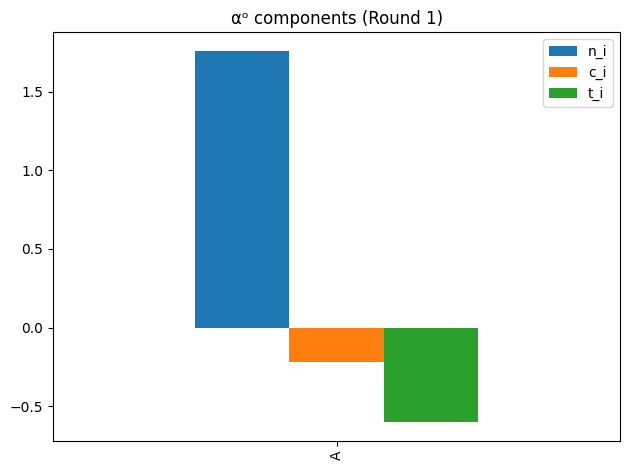

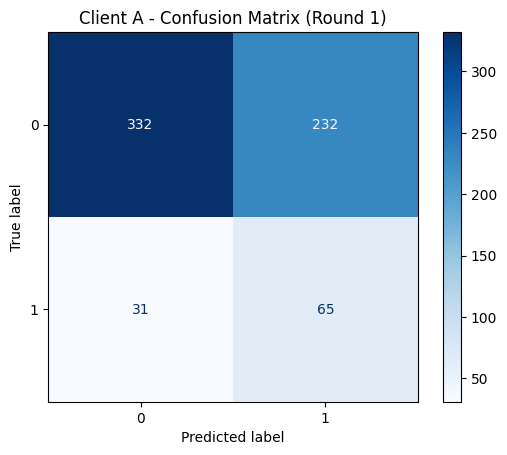


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9146    0.5887    0.7163       564
           1     0.2189    0.6771    0.3308        96

    accuracy                         0.6015       660
   macro avg     0.5667    0.6329    0.5235       660
weighted avg     0.8134    0.6015    0.6602       660


=== Round 2 ===
[Round 2] Global Accuracy: 0.5813 → 0.5912 | ΔW=1.7795

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2715


<Figure size 600x400 with 0 Axes>

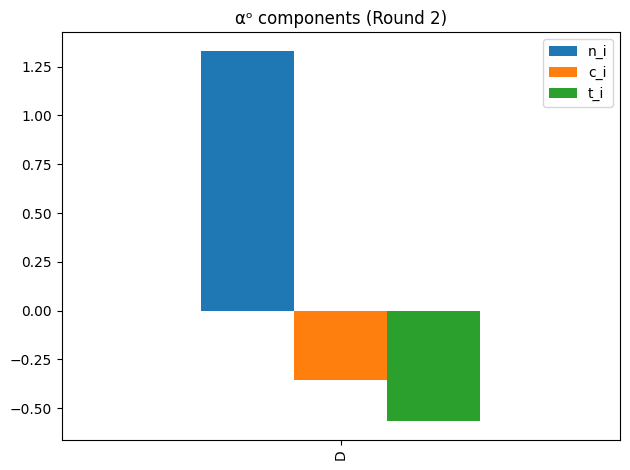

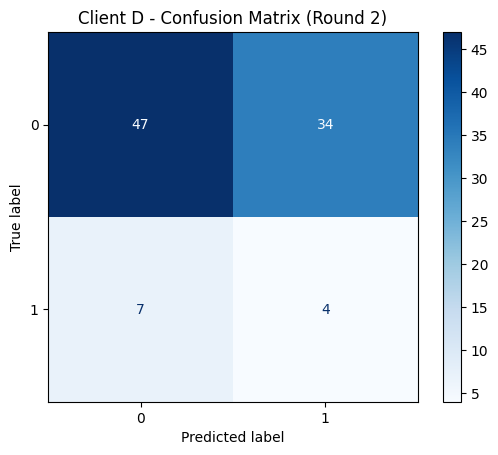


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.8704    0.5802    0.6963        81
           1     0.1053    0.3636    0.1633        11

    accuracy                         0.5543        92
   macro avg     0.4878    0.4719    0.4298        92
weighted avg     0.7789    0.5543    0.6326        92


=== Round 3 ===
[Round 3] Global Accuracy: 0.5912 → 0.5607 | ΔW=2.3672

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2956


<Figure size 600x400 with 0 Axes>

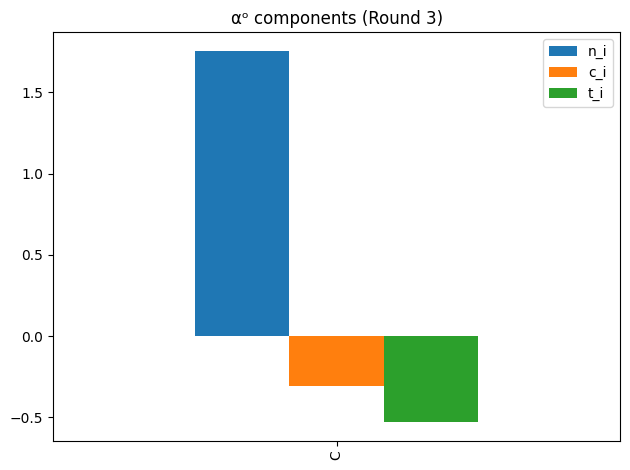

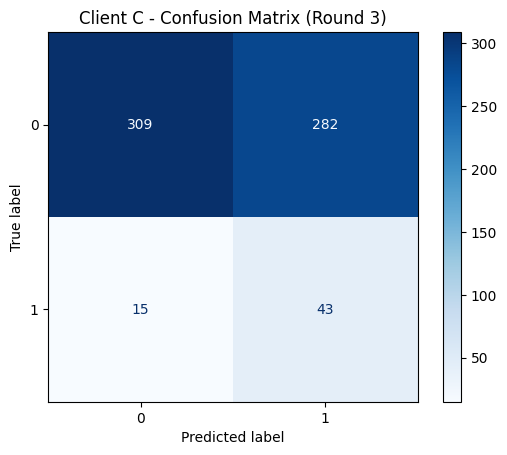


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9537    0.5228    0.6754       591
           1     0.1323    0.7414    0.2245        58

    accuracy                         0.5424       649
   macro avg     0.5430    0.6321    0.4500       649
weighted avg     0.8803    0.5424    0.6351       649


=== Round 4 ===
[Round 4] Global Accuracy: 0.5607 → 0.5826 | ΔW=1.9935

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2258


<Figure size 600x400 with 0 Axes>

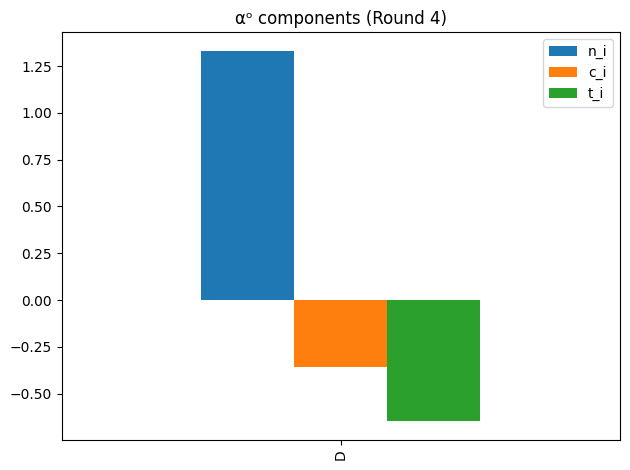

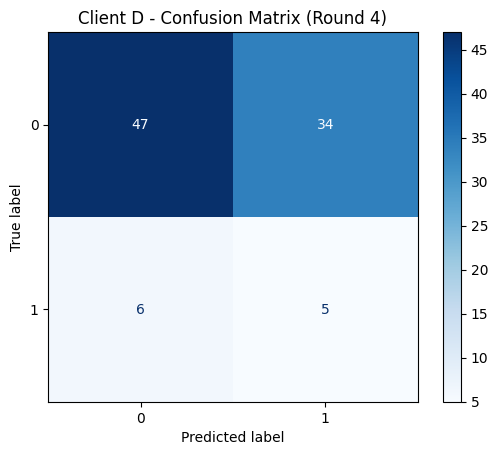


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.8868    0.5802    0.7015        81
           1     0.1282    0.4545    0.2000        11

    accuracy                         0.5652        92
   macro avg     0.5075    0.5174    0.4507        92
weighted avg     0.7961    0.5652    0.6415        92


=== Round 5 ===
[Round 5] Global Accuracy: 0.5826 → 0.5050 | ΔW=1.8053

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2353


<Figure size 600x400 with 0 Axes>

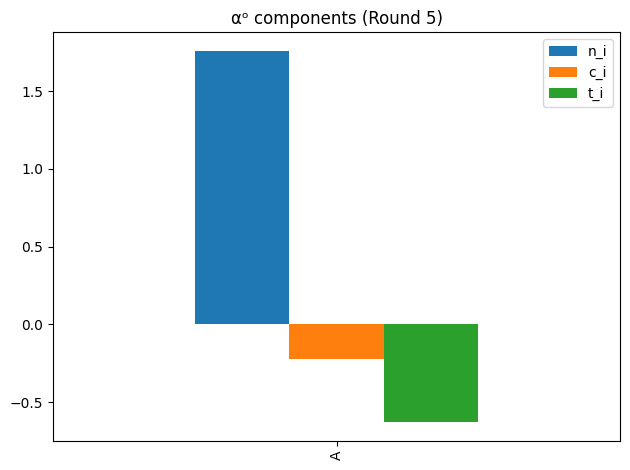

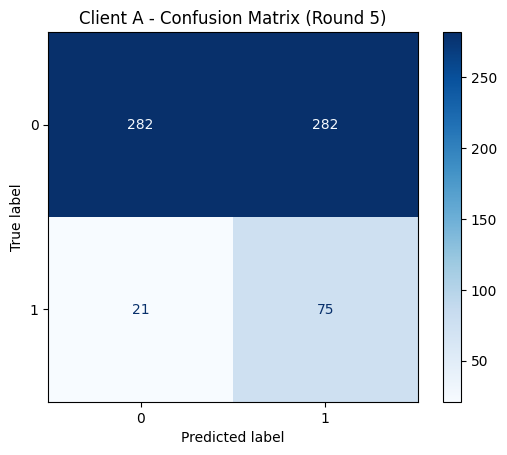


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9307    0.5000    0.6505       564
           1     0.2101    0.7812    0.3311        96

    accuracy                         0.5409       660
   macro avg     0.5704    0.6406    0.4908       660
weighted avg     0.8259    0.5409    0.6041       660


[최종 파라미터 통계 요약]
net.0.weight: mean=-0.002910, std=0.145204
net.0.bias: mean=-0.001798, std=0.149093
net.1.weight: mean=0.999997, std=0.002387
net.1.bias: mean=-0.000114, std=0.001910
net.1.running_mean: mean=-0.002881, std=0.151098
net.1.running_var: mean=0.366327, std=0.404051
net.1.num_batches_tracked: dtype=torch.int64 (skip)
net.4.weight: mean=-0.000068, std=0.051075
net.4.bias: mean=0.003015, std=0.052463
net.5.weight: mean=0.999998, std=0.002012
net.5.bias: mean=-0.000228, std=0.001545
net.5.running_mean: mean=-0.000061, std=0.231010
net.5.running_var: mean=0.202347, std=0.075431
net.5.num_batches_tracked: dtype=torch.int64

In [ ]:
# Participation(tᵒ), Label(cᵒ), Size(nᵒ) 완화 적용
# cᵒ = (kᵒ/K) × max(Hᵒ, ε·logK) / logK

import os, math, copy, random, argparse
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ------------------------------------------------
# 0) 결함 라벨 정의
# ------------------------------------------------
DEFECT_LABELS = ['Short_Shot_1','Bubble_1','Exfoliation_1','Blow_Hole_1','Deformation_1']

# ------------------------------------------------
# 1) 데이터 로드 및 3-way split
# ------------------------------------------------
def load_excel_binary(path: str):
    df = pd.read_excel(path).dropna(axis=1, how='all')
    for col in DEFECT_LABELS:
        if col not in df.columns:
            df[col] = 0
    y = df[DEFECT_LABELS].sum(axis=1).clip(upper=1).astype(int).values
    X = df.drop(columns=DEFECT_LABELS, errors='ignore')
    X = X.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X, y

def build_clients(path_map):
    raw = {}
    for cid, path in path_map.items():
        X, y = load_excel_binary(path)
        raw[cid] = {"X": X, "y": y}

    cols = set.intersection(*[set(v["X"].columns) for v in raw.values()])
    clients, metas = {}, {}
    for cid, v in raw.items():
        feat = v["X"][list(cols)].copy()
        mu, sigma = feat.mean(), feat.std().replace(0, 1)
        feat = (feat - mu) / sigma
        X = torch.tensor(feat.values.astype(np.float32))
        y = torch.tensor(v["y"], dtype=torch.long)
        allset = TensorDataset(X, y)
        n = len(allset)
        n_train, n_val = int(0.6 * n), int(0.2 * n)
        n_test = n - n_train - n_val
        tr, va, te = random_split(allset, [n_train, n_val, n_test],
                                  generator=torch.Generator().manual_seed(42))
        clients[cid] = {"train": tr, "val": va, "test": te, "all": allset}
        metas[cid] = {"n_samples": len(y),
                      "class_counts": pd.Series(v["y"]).value_counts().to_dict()}
    return clients, metas, list(cols)

# ------------------------------------------------
# 2) 개선된 Deep MLP 모델
# ------------------------------------------------
class DeepMLP(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),  # 추가
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# ================================================================
# 3) 완화 전략 함수 (Client Size / Label Distribution / Participation)
# ================================================================
def compute_ti(round_now, last_round, T_window=20, theta_time=0.5):
    """Participation Skew 완화"""
    if last_round is None:
        delta = T_window
    else:
        delta = min(max(0, round_now - last_round), T_window)
    return 1.0 + theta_time * (delta / max(1, T_window))

def compute_ci(class_counts, eps_frac=0.05, min_samples=1):
    """Label Skew 완화"""
    K = len(class_counts)
    total = sum(class_counts.values())
    if K == 0 or total == 0:
        return 1e-8
    H = 0.0
    for c in class_counts.values():
        if c > 0:
            p = c / total
            H -= p * math.log(p)
    logK = math.log(K + 1e-12)
    H_floor = eps_frac * logK
    H_tilde = max(H, H_floor)
    k_i = sum(1 for c in class_counts.values() if c >= min_samples)
    frac_k = k_i / K
    ci = max(1e-8, frac_k * (H_tilde / logK))
    return ci

def aggregate_with_softmax_weights(state_dicts, alpha_components,
                                   rho=1.0, beta=1.0, theta=1.0):
    """Size + Label + Participation Skew 완화 (softmax 기반)"""
    if not state_dicts:
        return None
    logits = {}
    for cid, comp in alpha_components.items():
        log_weight = (
            math.log(comp["n_i"] ** rho + 1e-12)
            + math.log(comp["c_i"] ** beta + 1e-12)
            + math.log(comp["t_i"] ** theta + 1e-12)
        )
        logits[cid] = log_weight

    max_logit = max(logits.values())
    exp_logits = {cid: math.exp(logits[cid] - max_logit) for cid in logits}
    total_exp = sum(exp_logits.values())
    alphas = {cid: exp_logits[cid] / total_exp for cid in logits}

    global_sd = None
    for cid, sd in state_dicts.items():
        w = alphas[cid]
        if global_sd is None:
            global_sd = {k: v.clone() * w for k, v in sd.items()}
        else:
            for k in global_sd:
                global_sd[k] += sd[k] * w
    return global_sd

# ------------------------------------------------
# 4) 학습 및 평가
# ------------------------------------------------
def local_train(model, dataset, lr, epochs, device, class_counts):
    """Weighted loss + DeepMLP 적용"""
    model = copy.deepcopy(model).to(device)
    model.train()

    total = sum(class_counts.values())
    w_0 = total / (2 * class_counts.get(0, 1))
    w_1 = total / (2 * class_counts.get(1, 1))
    class_weights = torch.tensor([w_0, w_1], dtype=torch.float32).to(device)

    crit = nn.CrossEntropyLoss(weight=class_weights)
    opt = optim.SGD(model.parameters(), lr=lr)
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    for _ in range(epochs):
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad()
            loss = crit(model(x), y)
            loss.backward()
            opt.step()

    return model.state_dict()

def evaluate(model, dataset, device, return_preds=False):
    model.eval()
    loader = DataLoader(dataset, batch_size=256)
    correct, total = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            pred = model(x).argmax(1)
            correct += pred.eq(y).sum().item()
            total += len(y)
            if return_preds:
                y_true += y.cpu().tolist()
                y_pred += pred.cpu().tolist()

    acc = correct / total if total > 0 else 0.0
    if return_preds:
        return acc, y_true, y_pred
    return acc

# ------------------------------------------------
# 5) 메인 루프
# ------------------------------------------------
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--rounds", type=int, default=5)
    args, _ = parser.parse_known_args()

    paths = {"A": "A.xlsx", "B": "B.xlsx", "C": "C.xlsx", "D": "D.xlsx"}
    clients, metas, cols = build_clients(paths)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    input_dim = clients["A"]["all"].tensors[0].shape[1]
    global_model = DeepMLP(input_dim=input_dim).to(device)

    last_round = {cid: None for cid in clients}
    combined_test = torch.utils.data.ConcatDataset([v["test"] for v in clients.values()])
    prev_global = copy.deepcopy(global_model.state_dict())

    for rnd in range(1, args.rounds + 1):
        print(f"\n=== Round {rnd} ===")

        # Participation 계산
        probs = {cid: compute_ti(rnd, last_round[cid]) for cid in clients}
        total_p = sum(probs.values())
        probs = {k: v / total_p for k, v in probs.items()}
        selected = [cid for cid in clients if random.random() < probs[cid]]
        if len(selected) == 0:
            selected = [random.choice(list(clients.keys()))]

        state_dicts = {}
        alpha_components = {}
        before_acc = evaluate(global_model, combined_test, device)

        # 각 클라이언트별 로컬 학습
        for cid in selected:
            ds = clients[cid]["train"]
            labels = [int(y) for _, y in ds]
            class_counts = pd.Series(labels).value_counts().to_dict()

            state_dict = local_train(global_model, ds, lr=0.01, epochs=5,
                                     device=device, class_counts=class_counts)
            state_dicts[cid] = state_dict

            n_i = math.sqrt(metas[cid]["n_samples"])
            c_i = compute_ci(class_counts)
            t_i = probs[cid]
            alpha_components[cid] = {"n_i": n_i, "c_i": c_i, "t_i": t_i}
            last_round[cid] = rnd

        # Softmax 기반 완화 적용
        new_global = aggregate_with_softmax_weights(state_dicts, alpha_components)
        if new_global is None:
            continue

        global_model.load_state_dict(new_global)

        after_acc, y_true, y_pred = evaluate(global_model, combined_test, device, return_preds=True)

        #  수정된 안정형 ΔW 계산 (float tensor만 포함)
        dW = 0.0
        for k in global_model.state_dict().keys():
            if global_model.state_dict()[k].dtype in (torch.float32, torch.float64):
                diff = global_model.state_dict()[k] - prev_global[k]
                dW += torch.norm(diff).item()
        prev_global = copy.deepcopy(global_model.state_dict())

        print(f"[Round {rnd}] Global Accuracy: {before_acc:.4f} → {after_acc:.4f} | ΔW={dW:.4f}")

        # αᵒ 구성요소 시각화
        df = pd.DataFrame(alpha_components).T.round(4)
        print("\nαᵒ 구성요소 (log scale):")
        print(df)
        plt.figure(figsize=(6, 4))
        np.log10(df + 1e-8).plot(kind="bar")
        plt.title(f"αᵒ components (Round {rnd})")
        plt.tight_layout()
        plt.show()

        # 각 클라이언트별 Confusion Matrix + Classification Report
        for cid in selected:
            _, yt, yp = evaluate(global_model, clients[cid]["test"], device, return_preds=True)
            cm = confusion_matrix(yt, yp)
            ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
            plt.title(f"Client {cid} - Confusion Matrix (Round {rnd})")
            plt.show()

            print(f"\n[Client {cid}] Classification Report:")
            print(classification_report(yt, yp, digits=4))

    print("\n[최종 파라미터 통계 요약]")
    for name, param in global_model.state_dict().items():
      if param.dtype in (torch.float32, torch.float64):
        print(f"{name}: mean={param.mean():.6f}, std={param.std():.6f}")
      else:
        print(f"{name}: dtype={param.dtype} (skip)")



- log 변환은 αᵢ 계산 시 곱셈 기반 요인들을 덧셈 구조로 선형화하고, Softmax와 결합해 수치적 안정성(log-sum-exp 안정화)과 비율 기반 정규화를 동시에 확보하기 위함


=== Round 1 ===
[Round 1] Global Accuracy: 0.1168 → 0.5169 | ΔW=1.5158

αᵒ 구성요소 (log scale):
       n_i     c_i   t_i
D  21.4476  0.4384  0.25


<Figure size 600x400 with 0 Axes>

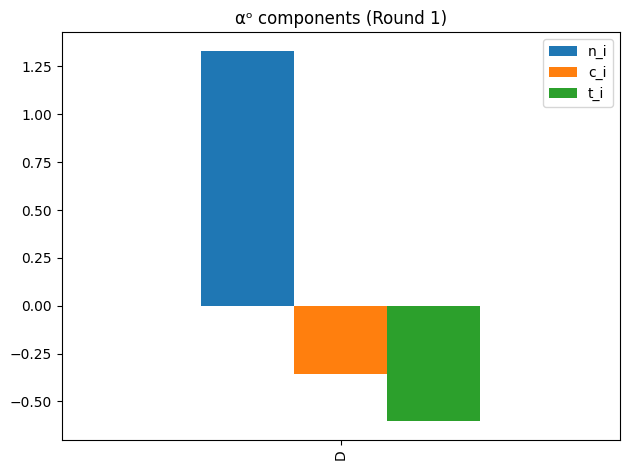

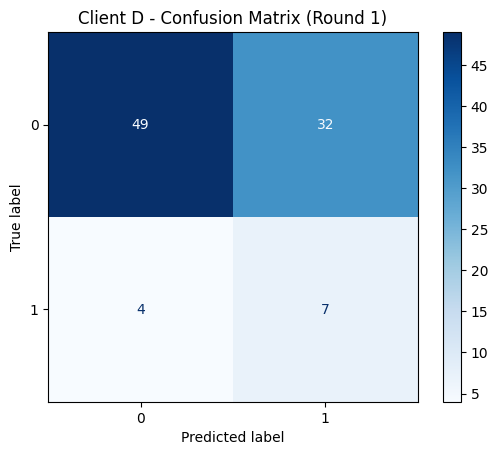


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9245    0.6049    0.7313        81
           1     0.1795    0.6364    0.2800        11

    accuracy                         0.6087        92
   macro avg     0.5520    0.6207    0.5057        92
weighted avg     0.8354    0.6087    0.6774        92


=== Round 2 ===
[Round 2] Global Accuracy: 0.5169 → 0.5866 | ΔW=0.3066

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.1855


<Figure size 600x400 with 0 Axes>

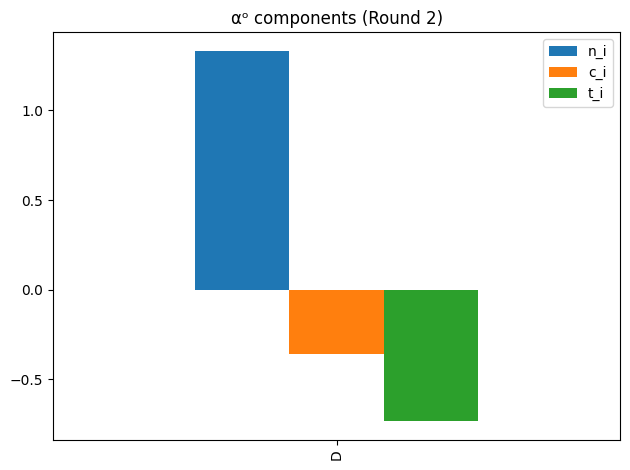

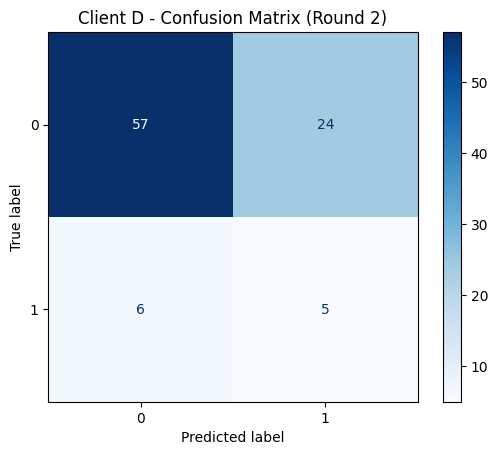


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9048    0.7037    0.7917        81
           1     0.1724    0.4545    0.2500        11

    accuracy                         0.6739        92
   macro avg     0.5386    0.5791    0.5208        92
weighted avg     0.8172    0.6739    0.7269        92


=== Round 3 ===
[Round 3] Global Accuracy: 0.5866 → 0.4419 | ΔW=0.4225

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2715
C  56.9649  0.4903  0.2715


<Figure size 600x400 with 0 Axes>

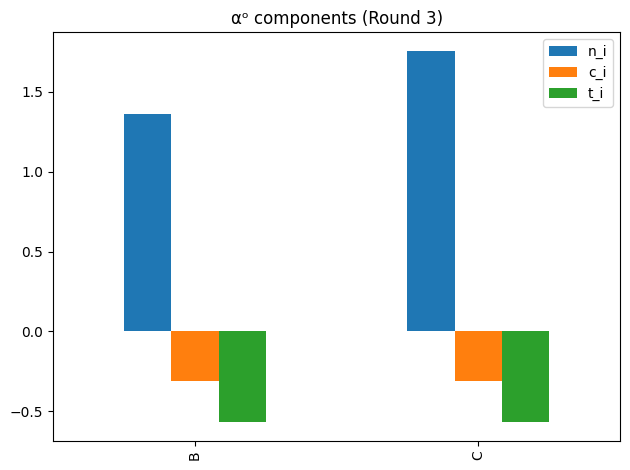

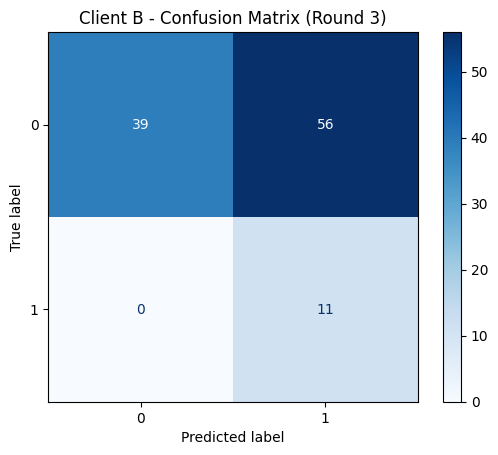


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.4105    0.5821        95
           1     0.1642    1.0000    0.2821        11

    accuracy                         0.4717       106
   macro avg     0.5821    0.7053    0.4321       106
weighted avg     0.9133    0.4717    0.5510       106



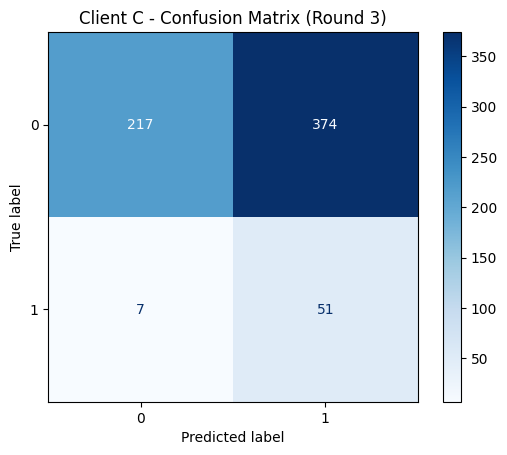


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9688    0.3672    0.5325       591
           1     0.1200    0.8793    0.2112        58

    accuracy                         0.4129       649
   macro avg     0.5444    0.6232    0.3718       649
weighted avg     0.8929    0.4129    0.5038       649


=== Round 4 ===
[Round 4] Global Accuracy: 0.4419 → 0.6596 | ΔW=0.3021

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2283


<Figure size 600x400 with 0 Axes>

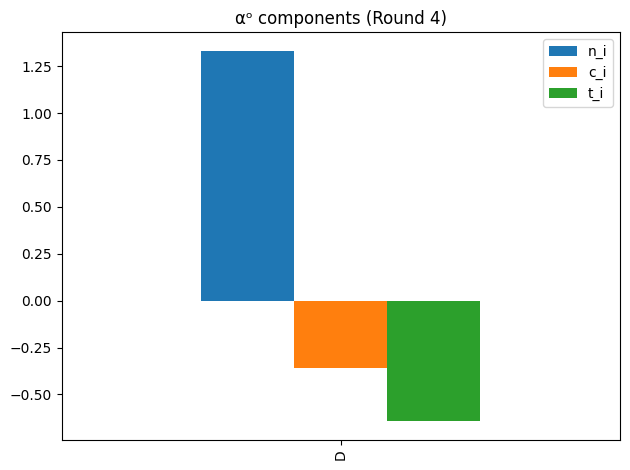

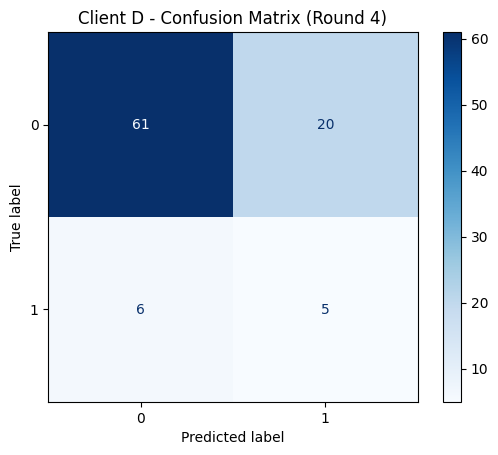


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9104    0.7531    0.8243        81
           1     0.2000    0.4545    0.2778        11

    accuracy                         0.7174        92
   macro avg     0.5552    0.6038    0.5511        92
weighted avg     0.8255    0.7174    0.7590        92


=== Round 5 ===
[Round 5] Global Accuracy: 0.6596 → 0.5554 | ΔW=0.2838

αᵒ 구성요소 (log scale):
       n_i     c_i    t_i
B  23.0217  0.4905  0.227


<Figure size 600x400 with 0 Axes>

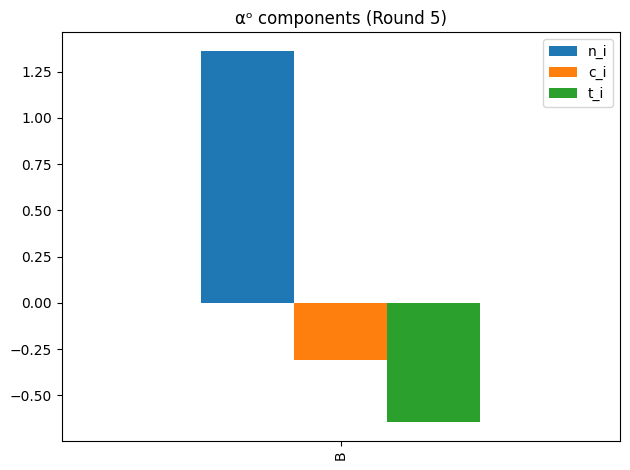

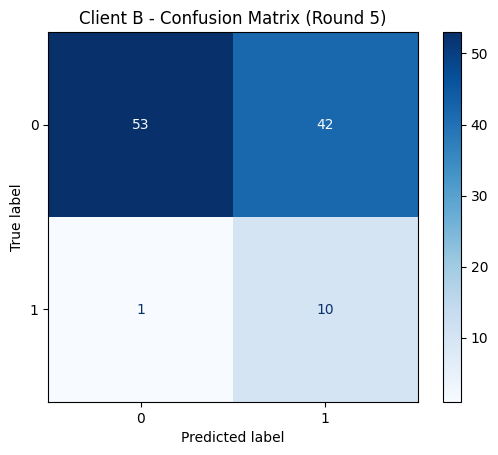


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9815    0.5579    0.7114        95
           1     0.1923    0.9091    0.3175        11

    accuracy                         0.5943       106
   macro avg     0.5869    0.7335    0.5144       106
weighted avg     0.8996    0.5943    0.6705       106


=== Round 6 ===
[Round 6] Global Accuracy: 0.5554 → 0.5965 | ΔW=0.6179

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2312


<Figure size 600x400 with 0 Axes>

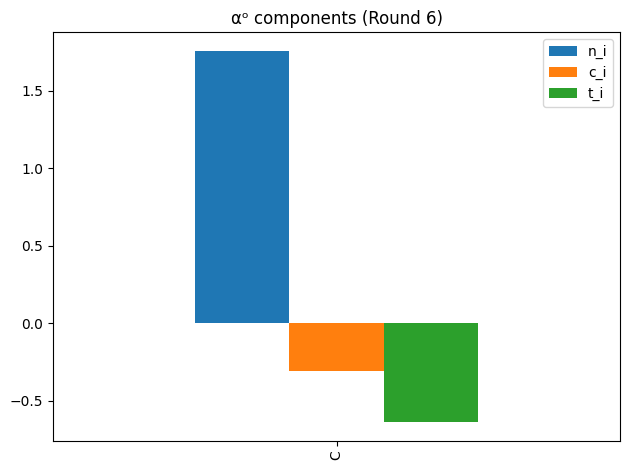

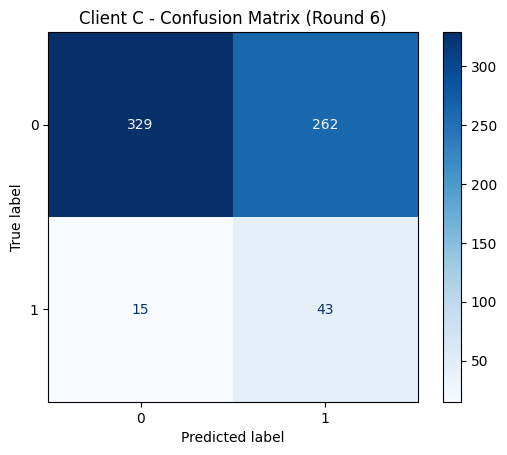


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9564    0.5567    0.7037       591
           1     0.1410    0.7414    0.2369        58

    accuracy                         0.5732       649
   macro avg     0.5487    0.6490    0.4703       649
weighted avg     0.8835    0.5732    0.6620       649


=== Round 7 ===
[Round 7] Global Accuracy: 0.5965 → 0.5939 | ΔW=0.5629

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2204


<Figure size 600x400 with 0 Axes>

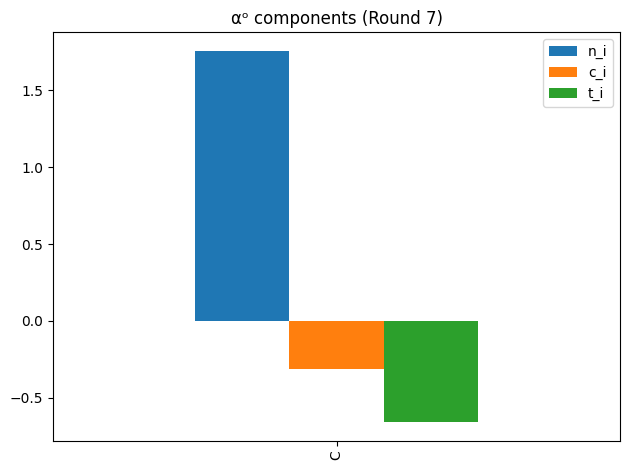

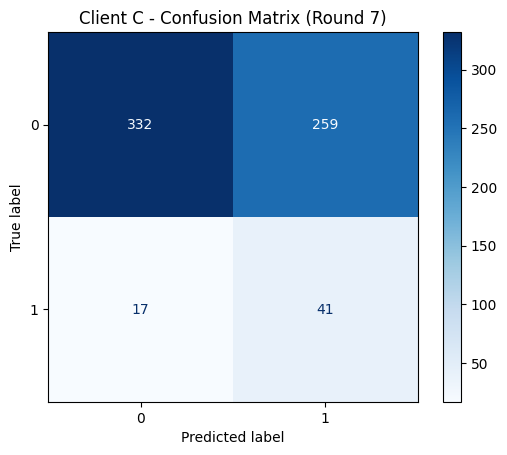


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9513    0.5618    0.7064       591
           1     0.1367    0.7069    0.2291        58

    accuracy                         0.5747       649
   macro avg     0.5440    0.6343    0.4677       649
weighted avg     0.8785    0.5747    0.6637       649


=== Round 8 ===
[Round 8] Global Accuracy: 0.5939 → 0.5853 | ΔW=0.3190

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2287


<Figure size 600x400 with 0 Axes>

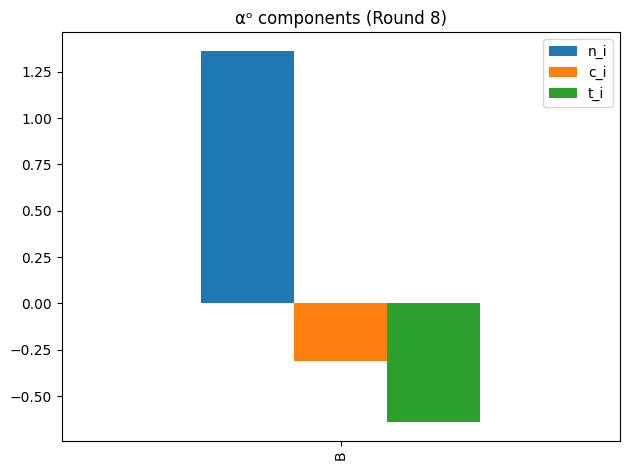

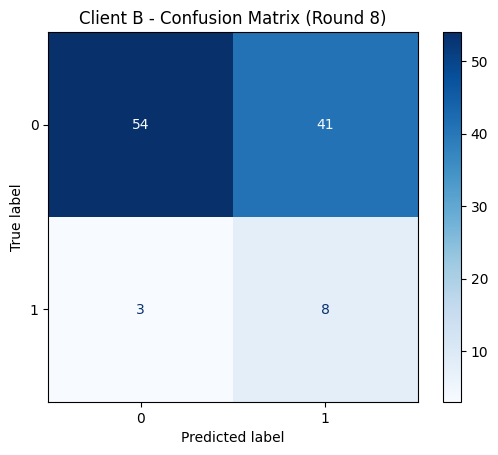


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9474    0.5684    0.7105        95
           1     0.1633    0.7273    0.2667        11

    accuracy                         0.5849       106
   macro avg     0.5553    0.6478    0.4886       106
weighted avg     0.8660    0.5849    0.6645       106


=== Round 9 ===
[Round 9] Global Accuracy: 0.5853 → 0.5899 | ΔW=0.6303

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2234


<Figure size 600x400 with 0 Axes>

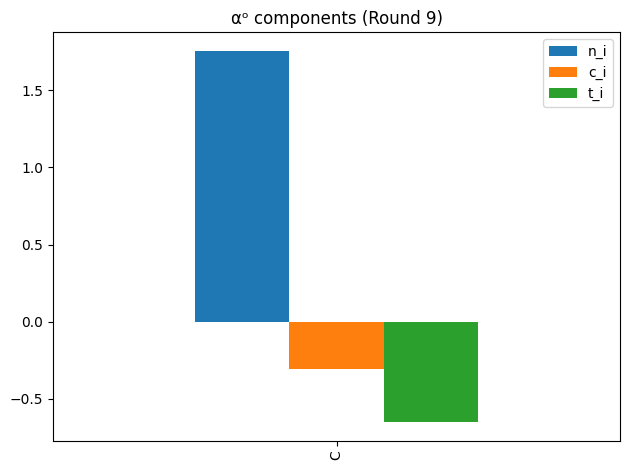

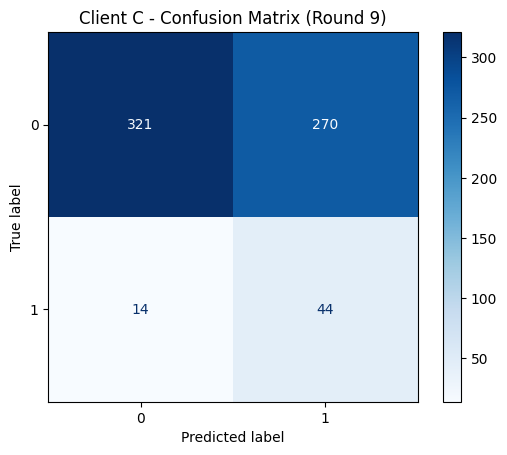


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9582    0.5431    0.6933       591
           1     0.1401    0.7586    0.2366        58

    accuracy                         0.5624       649
   macro avg     0.5492    0.6509    0.4649       649
weighted avg     0.8851    0.5624    0.6525       649


=== Round 10 ===
[Round 10] Global Accuracy: 0.5899 → 0.5846 | ΔW=0.5834

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.3175
B  23.0217  0.4905  0.2222
C  56.9649  0.4903  0.2169


<Figure size 600x400 with 0 Axes>

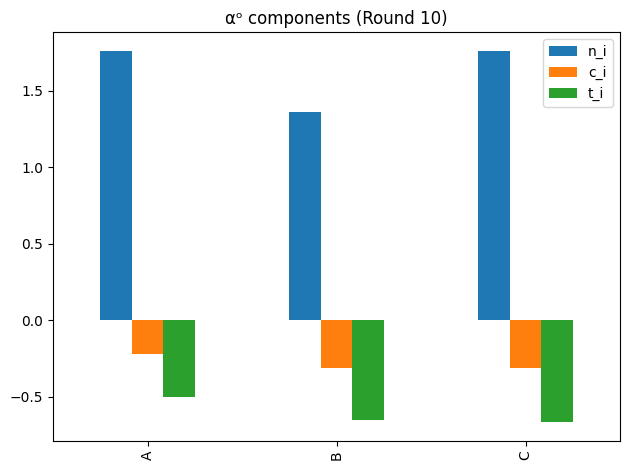

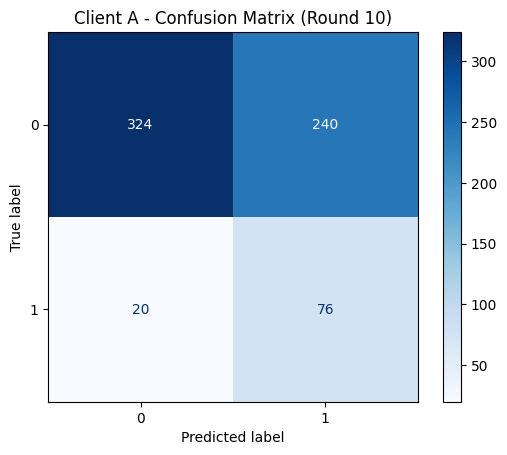


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9419    0.5745    0.7137       564
           1     0.2405    0.7917    0.3689        96

    accuracy                         0.6061       660
   macro avg     0.5912    0.6831    0.5413       660
weighted avg     0.8398    0.6061    0.6635       660



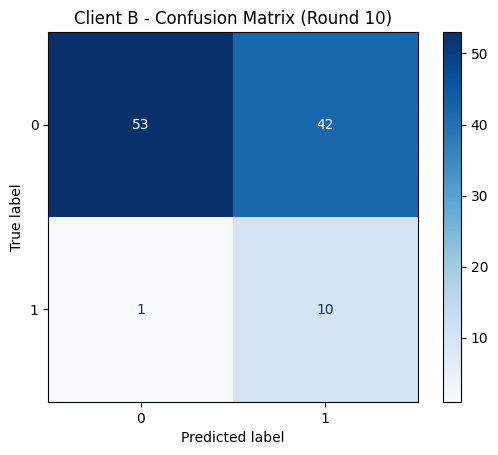


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9815    0.5579    0.7114        95
           1     0.1923    0.9091    0.3175        11

    accuracy                         0.5943       106
   macro avg     0.5869    0.7335    0.5144       106
weighted avg     0.8996    0.5943    0.6705       106



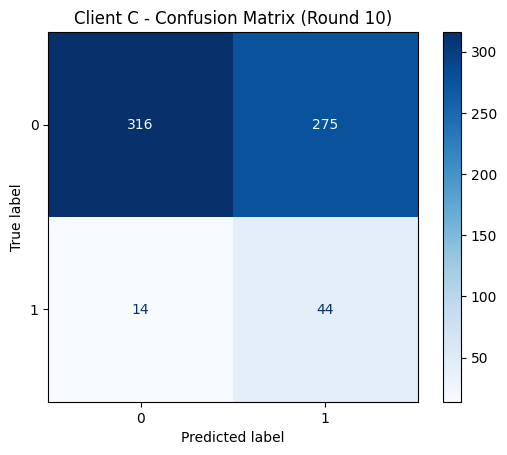


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9576    0.5347    0.6862       591
           1     0.1379    0.7586    0.2334        58

    accuracy                         0.5547       649
   macro avg     0.5478    0.6467    0.4598       649
weighted avg     0.8843    0.5547    0.6457       649


=== Round 11 ===
[Round 11] Global Accuracy: 0.5846 → 0.6019 | ΔW=0.3367

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2412


<Figure size 600x400 with 0 Axes>

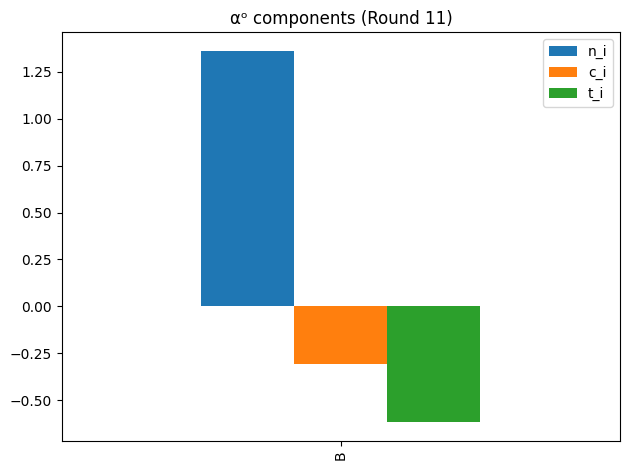

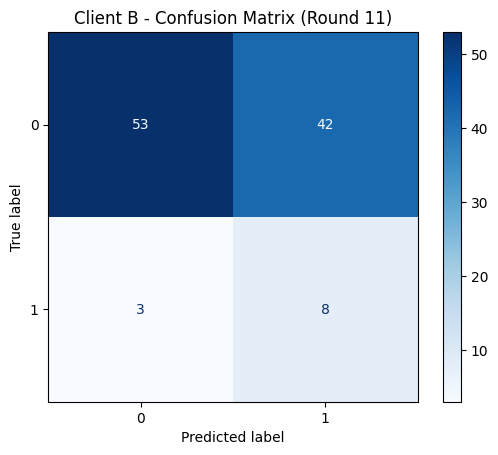


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9464    0.5579    0.7020        95
           1     0.1600    0.7273    0.2623        11

    accuracy                         0.5755       106
   macro avg     0.5532    0.6426    0.4821       106
weighted avg     0.8648    0.5755    0.6564       106


=== Round 12 ===
[Round 12] Global Accuracy: 0.6019 → 0.6224 | ΔW=0.3954

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2775


<Figure size 600x400 with 0 Axes>

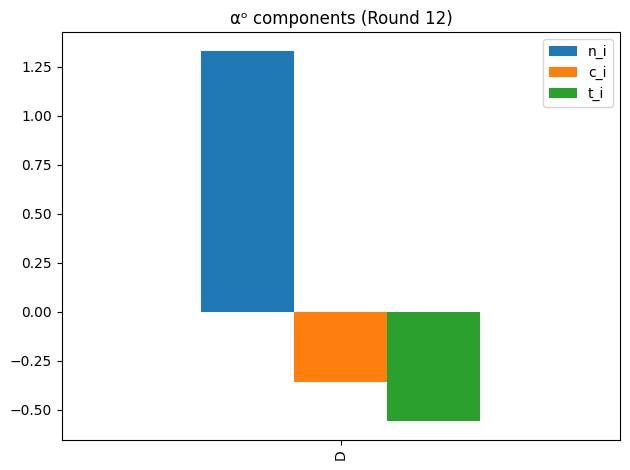

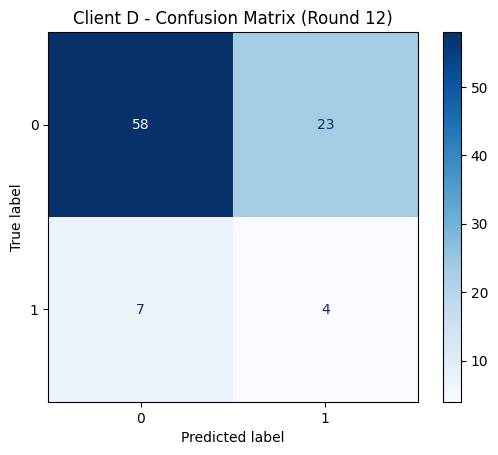


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.8923    0.7160    0.7945        81
           1     0.1481    0.3636    0.2105        11

    accuracy                         0.6739        92
   macro avg     0.5202    0.5398    0.5025        92
weighted avg     0.8033    0.6739    0.7247        92


=== Round 13 ===
[Round 13] Global Accuracy: 0.6224 → 0.5428 | ΔW=0.8536

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2544


<Figure size 600x400 with 0 Axes>

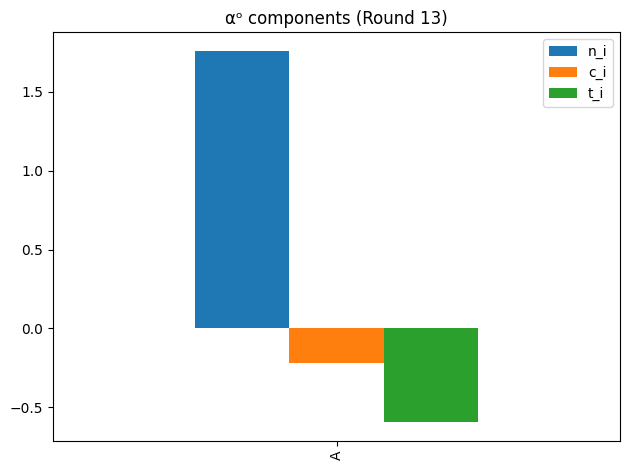

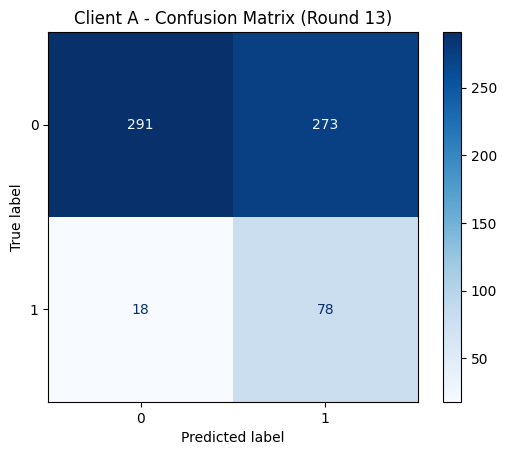


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9417    0.5160    0.6667       564
           1     0.2222    0.8125    0.3490        96

    accuracy                         0.5591       660
   macro avg     0.5820    0.6642    0.5078       660
weighted avg     0.8371    0.5591    0.6205       660


=== Round 14 ===
[Round 14] Global Accuracy: 0.5428 → 0.5886 | ΔW=0.3691

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2529
D  21.4476  0.4384  0.2471


<Figure size 600x400 with 0 Axes>

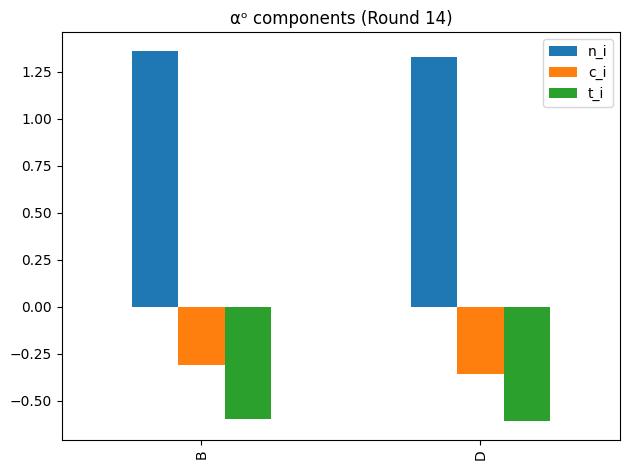

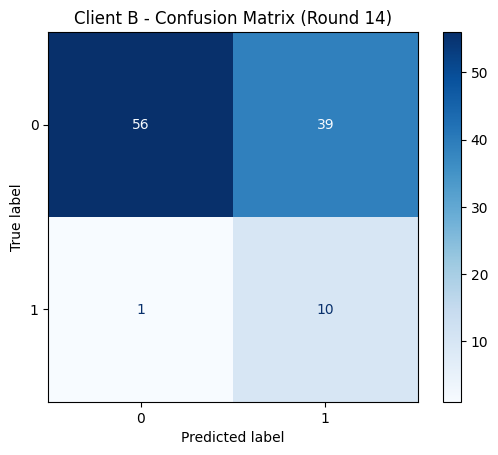


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9825    0.5895    0.7368        95
           1     0.2041    0.9091    0.3333        11

    accuracy                         0.6226       106
   macro avg     0.5933    0.7493    0.5351       106
weighted avg     0.9017    0.6226    0.6950       106



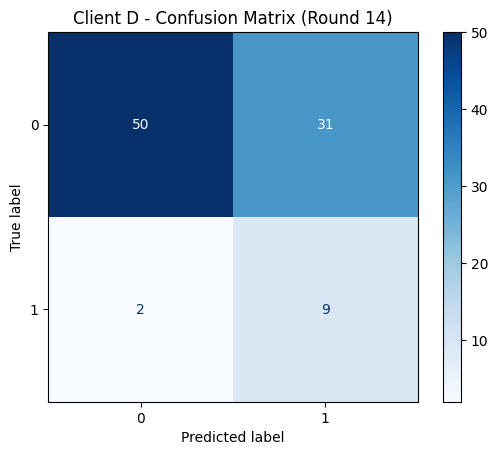


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9615    0.6173    0.7519        81
           1     0.2250    0.8182    0.3529        11

    accuracy                         0.6413        92
   macro avg     0.5933    0.7177    0.5524        92
weighted avg     0.8735    0.6413    0.7042        92


=== Round 15 ===
[Round 15] Global Accuracy: 0.5886 → 0.6065 | ΔW=0.6037

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2485
C  56.9649  0.4903  0.2663
D  21.4476  0.4384  0.2426


<Figure size 600x400 with 0 Axes>

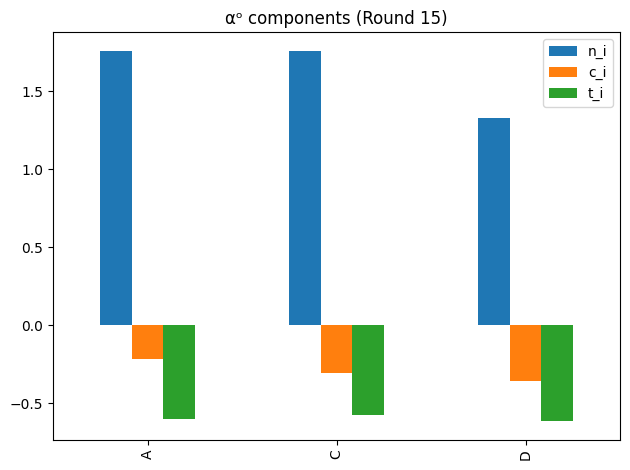

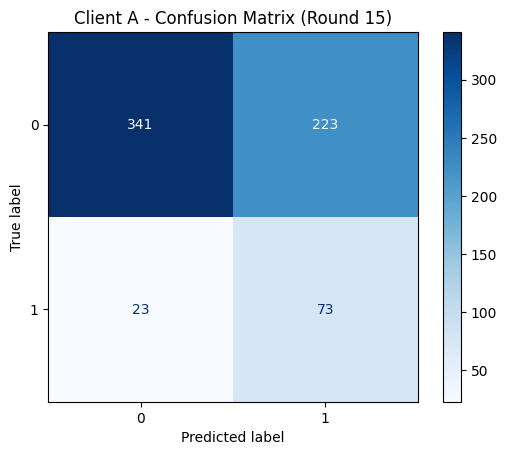


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9368    0.6046    0.7349       564
           1     0.2466    0.7604    0.3724        96

    accuracy                         0.6273       660
   macro avg     0.5917    0.6825    0.5537       660
weighted avg     0.8364    0.6273    0.6822       660



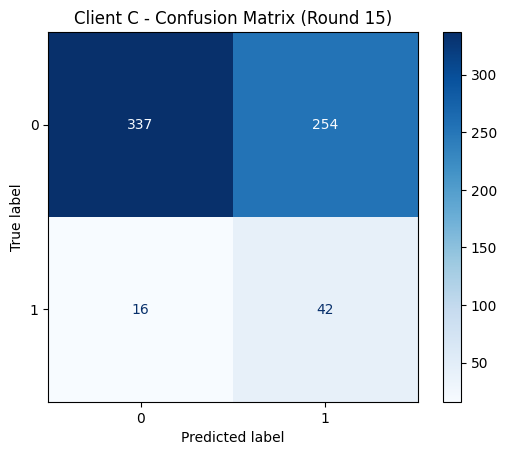


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9547    0.5702    0.7140       591
           1     0.1419    0.7241    0.2373        58

    accuracy                         0.5840       649
   macro avg     0.5483    0.6472    0.4756       649
weighted avg     0.8820    0.5840    0.6714       649



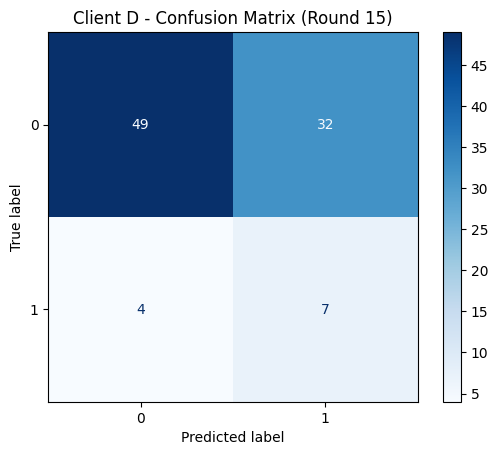


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9245    0.6049    0.7313        81
           1     0.1795    0.6364    0.2800        11

    accuracy                         0.6087        92
   macro avg     0.5520    0.6207    0.5057        92
weighted avg     0.8354    0.6087    0.6774        92


=== Round 16 ===
[Round 16] Global Accuracy: 0.6065 → 0.6490 | ΔW=0.8161

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2485


<Figure size 600x400 with 0 Axes>

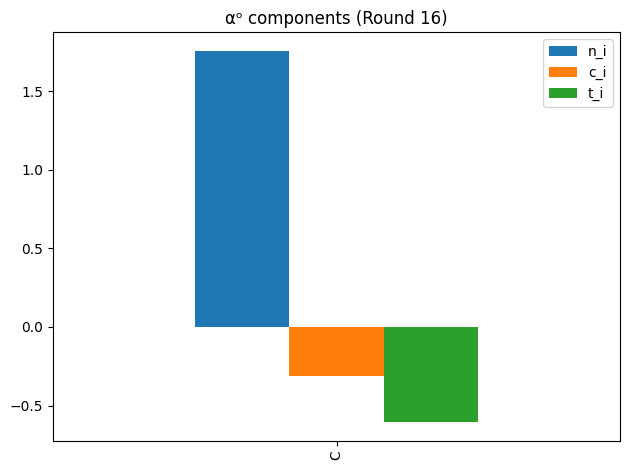

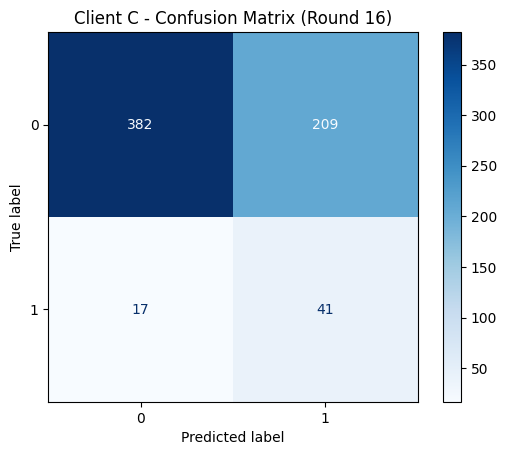


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9574    0.6464    0.7717       591
           1     0.1640    0.7069    0.2662        58

    accuracy                         0.6518       649
   macro avg     0.5607    0.6766    0.5190       649
weighted avg     0.8865    0.6518    0.7265       649


=== Round 17 ===
[Round 17] Global Accuracy: 0.6490 → 0.6410 | ΔW=0.6262

αᵒ 구성요소 (log scale):
       n_i     c_i   t_i
D  21.4476  0.4384  0.25


<Figure size 600x400 with 0 Axes>

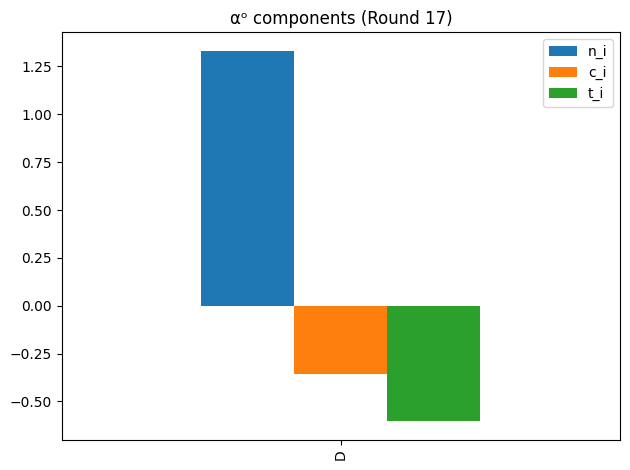

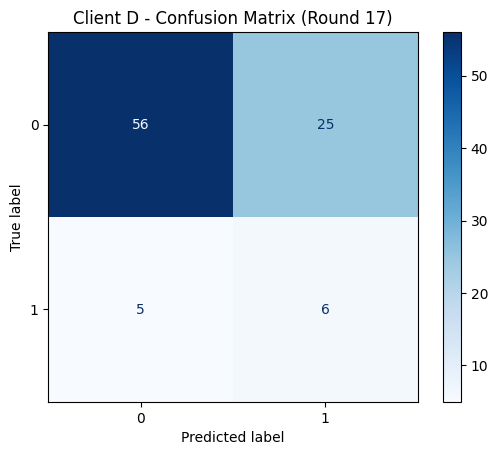


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9180    0.6914    0.7887        81
           1     0.1935    0.5455    0.2857        11

    accuracy                         0.6739        92
   macro avg     0.5558    0.6184    0.5372        92
weighted avg     0.8314    0.6739    0.7286        92


=== Round 18 ===
[Round 18] Global Accuracy: 0.6410 → 0.6304 | ΔW=0.9246

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2471


<Figure size 600x400 with 0 Axes>

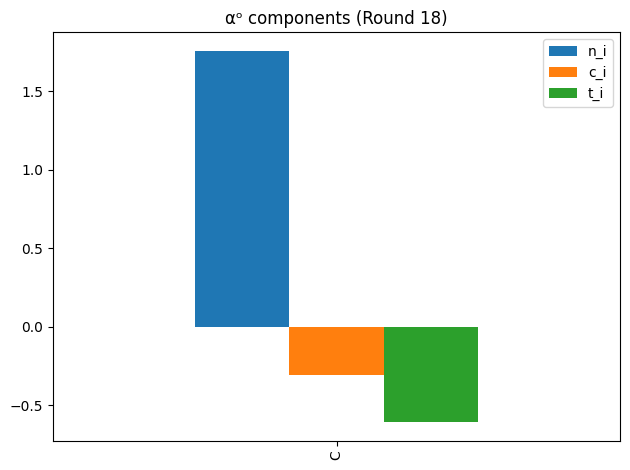

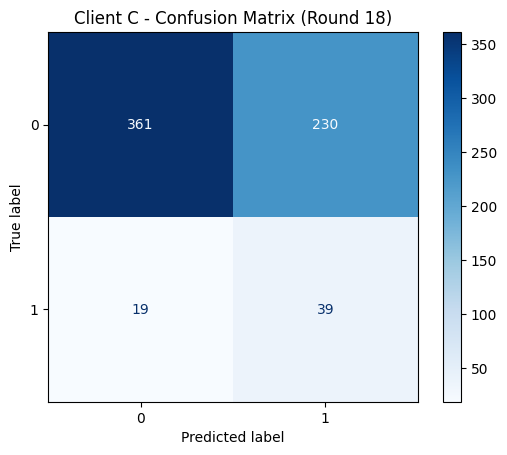


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9500    0.6108    0.7436       591
           1     0.1450    0.6724    0.2385        58

    accuracy                         0.6163       649
   macro avg     0.5475    0.6416    0.4910       649
weighted avg     0.8781    0.6163    0.6984       649


=== Round 19 ===
[Round 19] Global Accuracy: 0.6304 → 0.5820 | ΔW=0.8941

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2558


<Figure size 600x400 with 0 Axes>

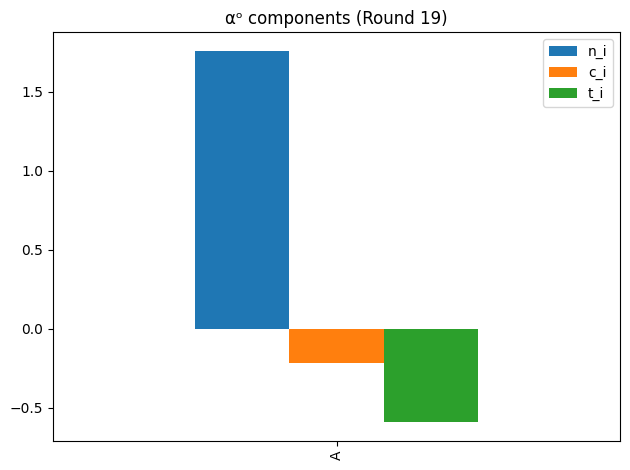

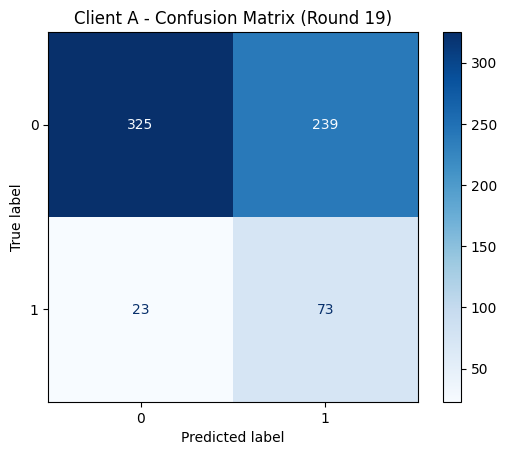


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9339    0.5762    0.7127       564
           1     0.2340    0.7604    0.3578        96

    accuracy                         0.6030       660
   macro avg     0.5839    0.6683    0.5353       660
weighted avg     0.8321    0.6030    0.6611       660


=== Round 20 ===
[Round 20] Global Accuracy: 0.5820 → 0.6098 | ΔW=0.4807

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2674


<Figure size 600x400 with 0 Axes>

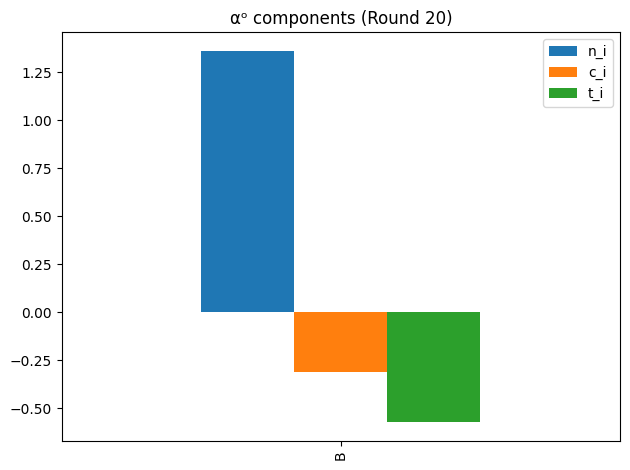

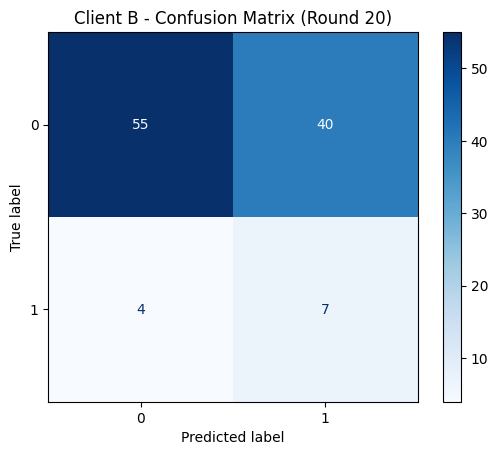


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9322    0.5789    0.7143        95
           1     0.1489    0.6364    0.2414        11

    accuracy                         0.5849       106
   macro avg     0.5406    0.6077    0.4778       106
weighted avg     0.8509    0.5849    0.6652       106


=== Round 21 ===
[Round 21] Global Accuracy: 0.6098 → 0.6676 | ΔW=0.4341

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2412


<Figure size 600x400 with 0 Axes>

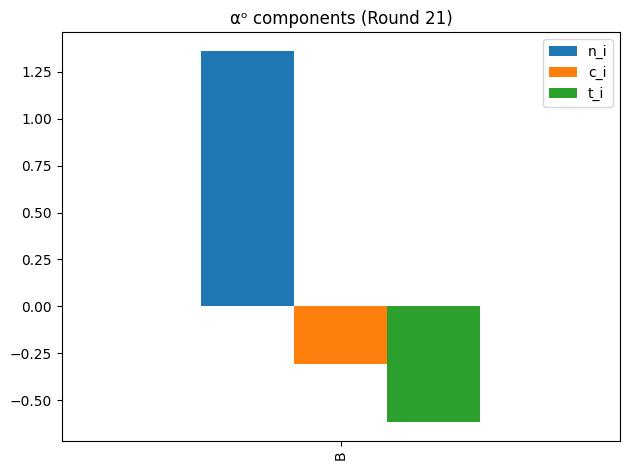

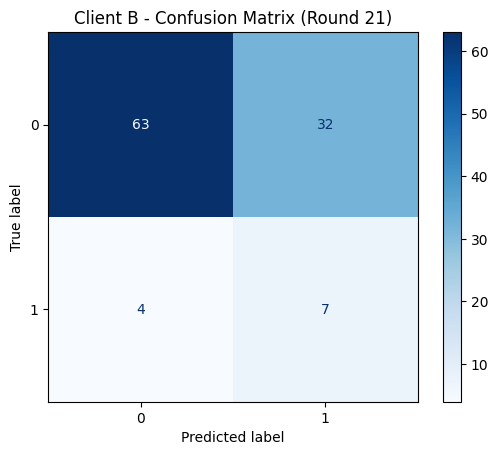


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9403    0.6632    0.7778        95
           1     0.1795    0.6364    0.2800        11

    accuracy                         0.6604       106
   macro avg     0.5599    0.6498    0.5289       106
weighted avg     0.8613    0.6604    0.7261       106


=== Round 22 ===
[Round 22] Global Accuracy: 0.6676 → 0.6324 | ΔW=0.8602

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2486
D  21.4476  0.4384  0.2601


<Figure size 600x400 with 0 Axes>

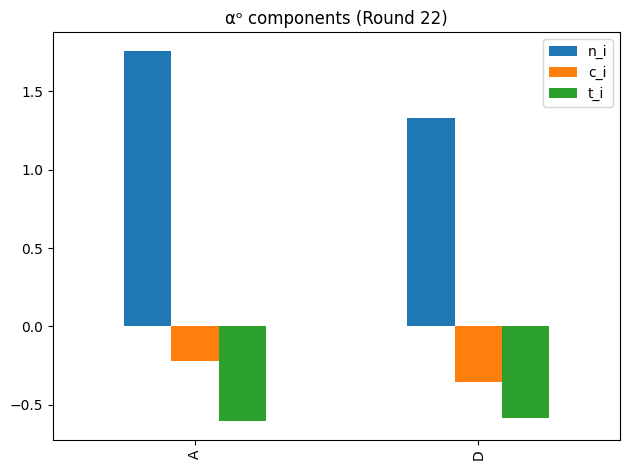

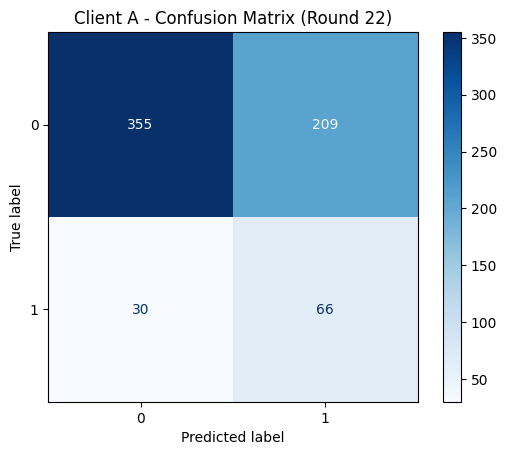


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9221    0.6294    0.7482       564
           1     0.2400    0.6875    0.3558        96

    accuracy                         0.6379       660
   macro avg     0.5810    0.6585    0.5520       660
weighted avg     0.8229    0.6379    0.6911       660



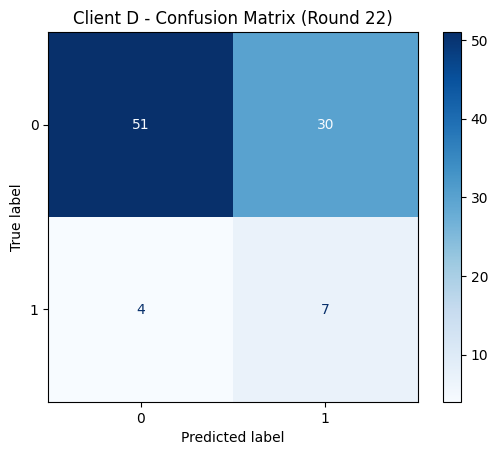


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9273    0.6296    0.7500        81
           1     0.1892    0.6364    0.2917        11

    accuracy                         0.6304        92
   macro avg     0.5582    0.6330    0.5208        92
weighted avg     0.8390    0.6304    0.6952        92


=== Round 23 ===
[Round 23] Global Accuracy: 0.6324 → 0.6410 | ΔW=0.6708

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2426


<Figure size 600x400 with 0 Axes>

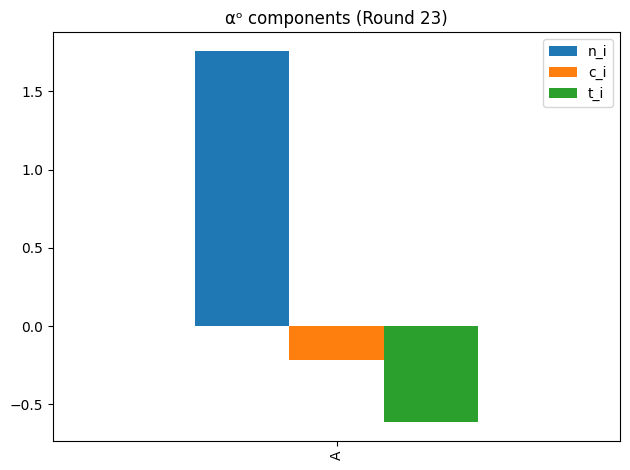

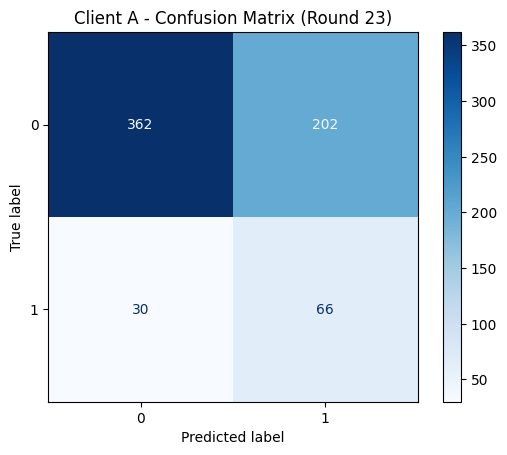


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9235    0.6418    0.7573       564
           1     0.2463    0.6875    0.3626        96

    accuracy                         0.6485       660
   macro avg     0.5849    0.6647    0.5600       660
weighted avg     0.8250    0.6485    0.6999       660


=== Round 24 ===
[Round 24] Global Accuracy: 0.6410 → 0.6437 | ΔW=0.4841

αᵒ 구성요소 (log scale):
       n_i     c_i   t_i
B  23.0217  0.4905  0.25


<Figure size 600x400 with 0 Axes>

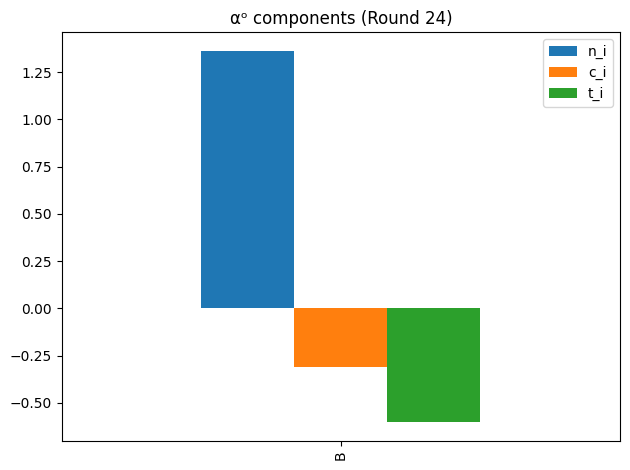

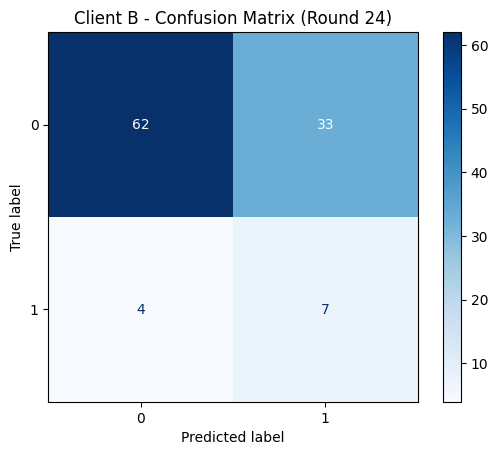


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9394    0.6526    0.7702        95
           1     0.1750    0.6364    0.2745        11

    accuracy                         0.6509       106
   macro avg     0.5572    0.6445    0.5223       106
weighted avg     0.8601    0.6509    0.7187       106


=== Round 25 ===
[Round 25] Global Accuracy: 0.6437 → 0.6722 | ΔW=0.4736

αᵒ 구성요소 (log scale):
       n_i     c_i    t_i
B  23.0217  0.4905  0.237


<Figure size 600x400 with 0 Axes>

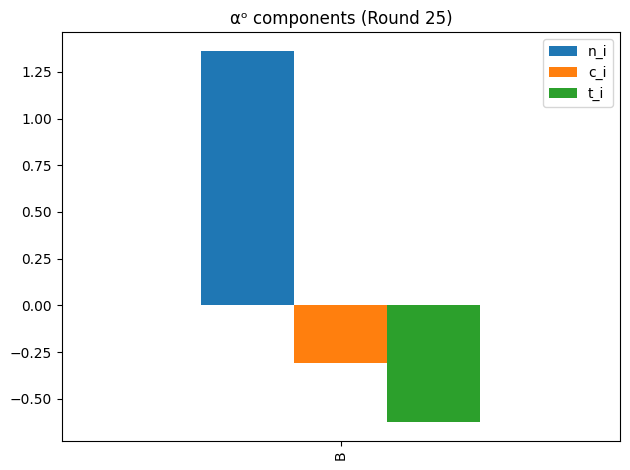

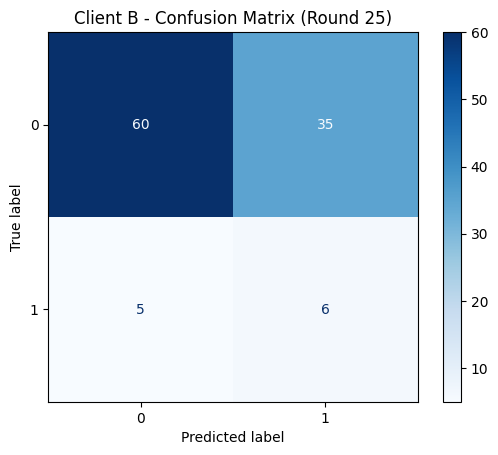


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9231    0.6316    0.7500        95
           1     0.1463    0.5455    0.2308        11

    accuracy                         0.6226       106
   macro avg     0.5347    0.5885    0.4904       106
weighted avg     0.8425    0.6226    0.6961       106


=== Round 26 ===
[Round 26] Global Accuracy: 0.6722 → 0.6676 | ΔW=1.1958

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2727


<Figure size 600x400 with 0 Axes>

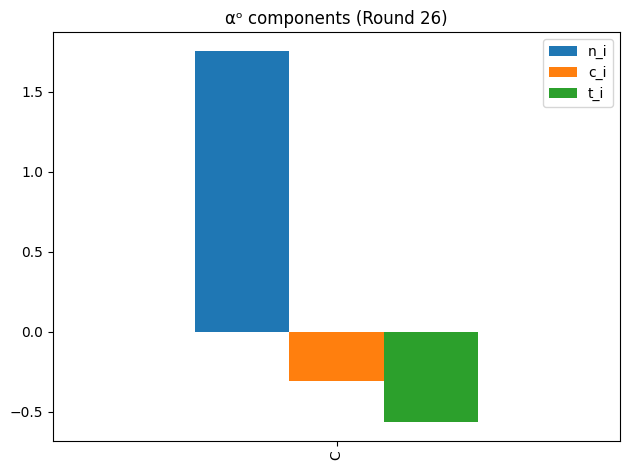

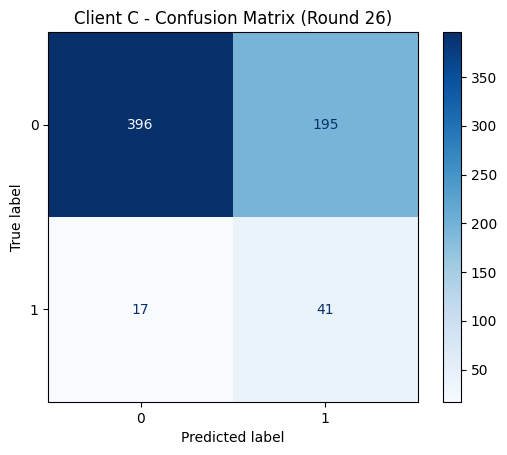


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9588    0.6701    0.7888       591
           1     0.1737    0.7069    0.2789        58

    accuracy                         0.6733       649
   macro avg     0.5663    0.6885    0.5339       649
weighted avg     0.8887    0.6733    0.7433       649


=== Round 27 ===
[Round 27] Global Accuracy: 0.6676 → 0.6609 | ΔW=0.6433

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2442


<Figure size 600x400 with 0 Axes>

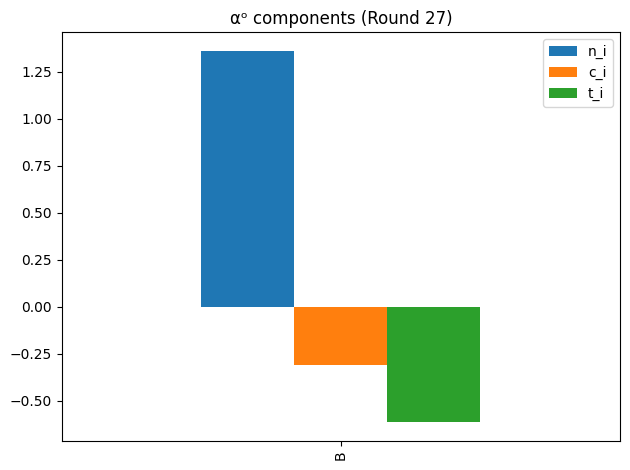

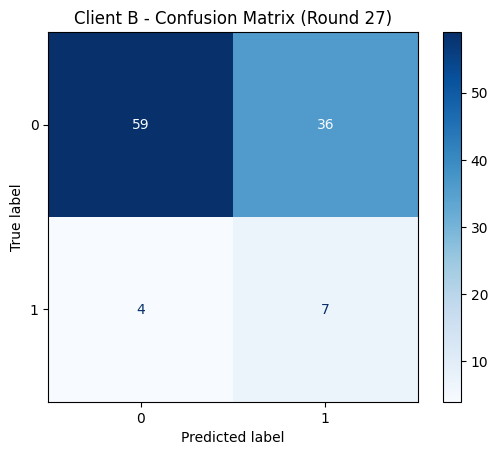


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9365    0.6211    0.7468        95
           1     0.1628    0.6364    0.2593        11

    accuracy                         0.6226       106
   macro avg     0.5496    0.6287    0.5030       106
weighted avg     0.8562    0.6226    0.6962       106


=== Round 28 ===
[Round 28] Global Accuracy: 0.6609 → 0.6443 | ΔW=1.3817

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2586


<Figure size 600x400 with 0 Axes>

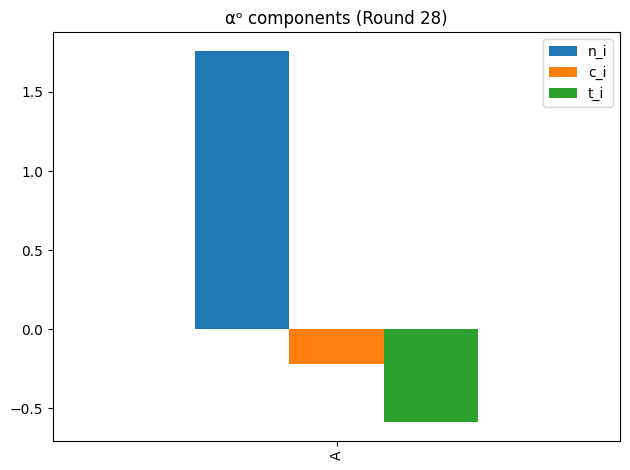

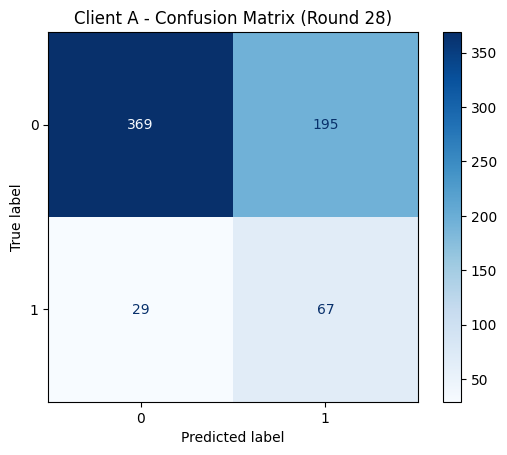


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9271    0.6543    0.7672       564
           1     0.2557    0.6979    0.3743        96

    accuracy                         0.6606       660
   macro avg     0.5914    0.6761    0.5707       660
weighted avg     0.8295    0.6606    0.7100       660


=== Round 29 ===
[Round 29] Global Accuracy: 0.6443 → 0.6005 | ΔW=0.7558

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2370
D  21.4476  0.4384  0.2717


<Figure size 600x400 with 0 Axes>

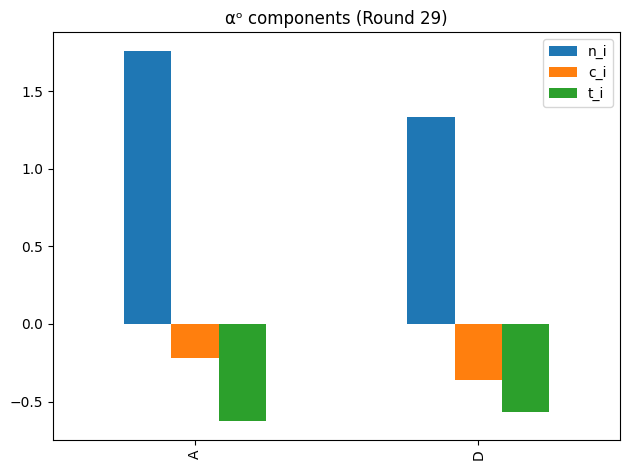

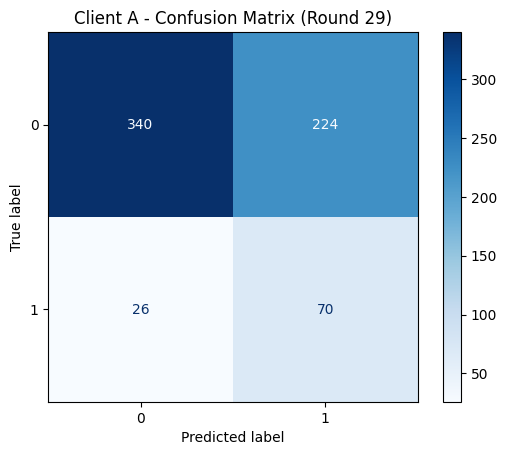


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9290    0.6028    0.7312       564
           1     0.2381    0.7292    0.3590        96

    accuracy                         0.6212       660
   macro avg     0.5835    0.6660    0.5451       660
weighted avg     0.8285    0.6212    0.6770       660



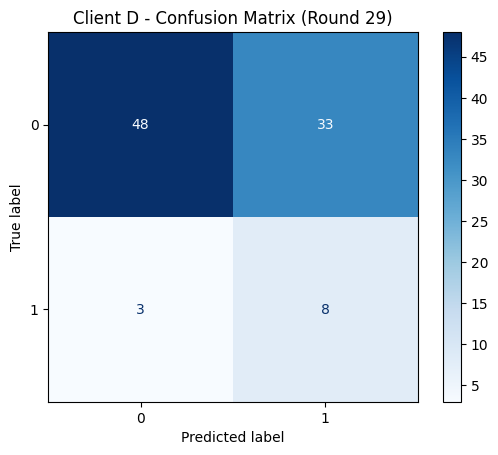


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9412    0.5926    0.7273        81
           1     0.1951    0.7273    0.3077        11

    accuracy                         0.6087        92
   macro avg     0.5681    0.6599    0.5175        92
weighted avg     0.8520    0.6087    0.6771        92


=== Round 30 ===
[Round 30] Global Accuracy: 0.6005 → 0.5926 | ΔW=0.5735

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2544
D  21.4476  0.4384  0.2426


<Figure size 600x400 with 0 Axes>

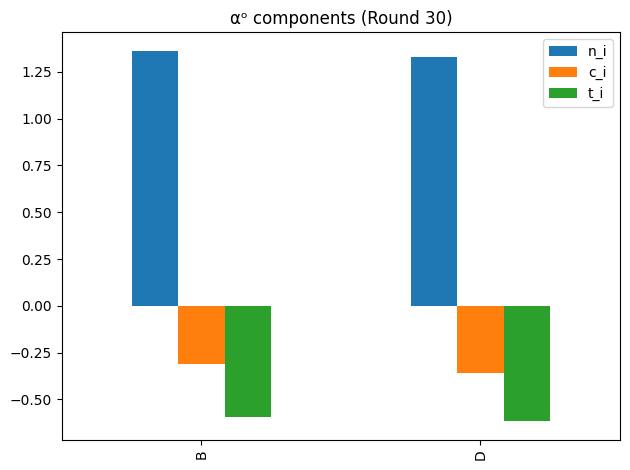

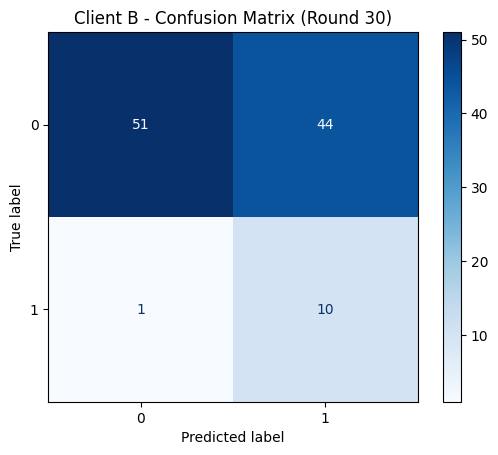


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9808    0.5368    0.6939        95
           1     0.1852    0.9091    0.3077        11

    accuracy                         0.5755       106
   macro avg     0.5830    0.7230    0.5008       106
weighted avg     0.8982    0.5755    0.6538       106



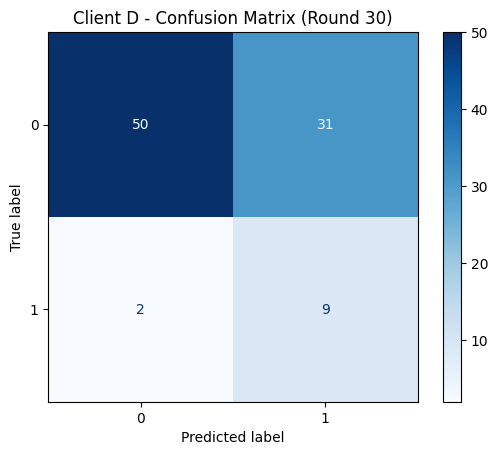


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9615    0.6173    0.7519        81
           1     0.2250    0.8182    0.3529        11

    accuracy                         0.6413        92
   macro avg     0.5933    0.7177    0.5524        92
weighted avg     0.8735    0.6413    0.7042        92


=== Round 31 ===
[Round 31] Global Accuracy: 0.5926 → 0.6423 | ΔW=1.0490

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2485
B  23.0217  0.4905  0.2426


<Figure size 600x400 with 0 Axes>

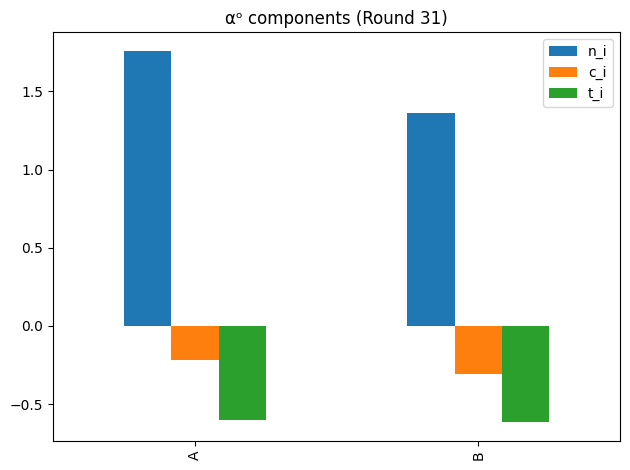

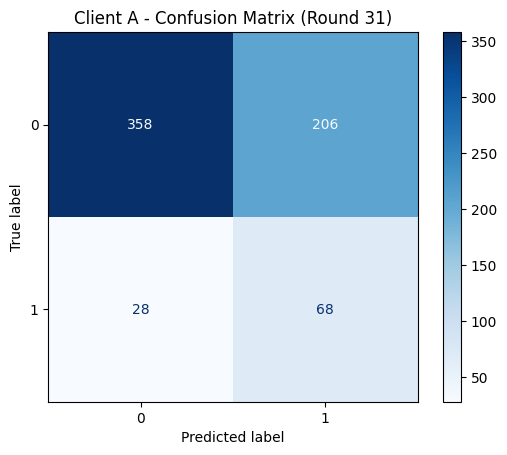


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9275    0.6348    0.7537       564
           1     0.2482    0.7083    0.3676        96

    accuracy                         0.6455       660
   macro avg     0.5878    0.6715    0.5606       660
weighted avg     0.8287    0.6455    0.6975       660



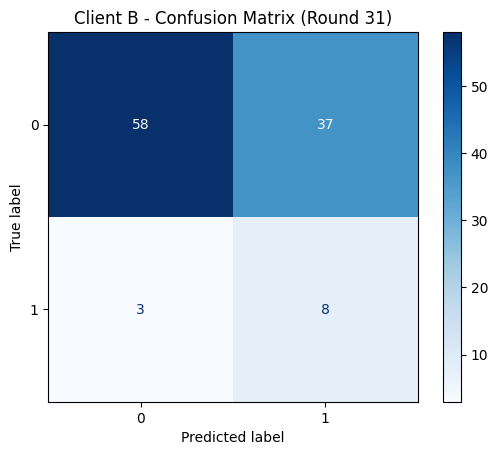


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9508    0.6105    0.7436        95
           1     0.1778    0.7273    0.2857        11

    accuracy                         0.6226       106
   macro avg     0.5643    0.6689    0.5147       106
weighted avg     0.8706    0.6226    0.6961       106


=== Round 32 ===
[Round 32] Global Accuracy: 0.6423 → 0.6815 | ΔW=0.7485

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2412


<Figure size 600x400 with 0 Axes>

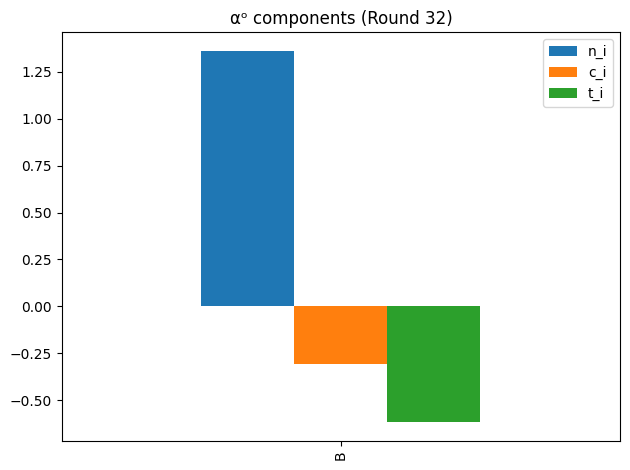

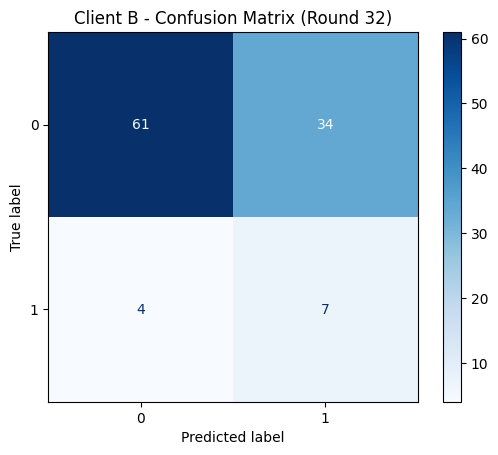


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9385    0.6421    0.7625        95
           1     0.1707    0.6364    0.2692        11

    accuracy                         0.6415       106
   macro avg     0.5546    0.6392    0.5159       106
weighted avg     0.8588    0.6415    0.7113       106


=== Round 33 ===
[Round 33] Global Accuracy: 0.6815 → 0.6928 | ΔW=0.4639

αᵒ 구성요소 (log scale):
       n_i     c_i    t_i
B  23.0217  0.4905  0.237


<Figure size 600x400 with 0 Axes>

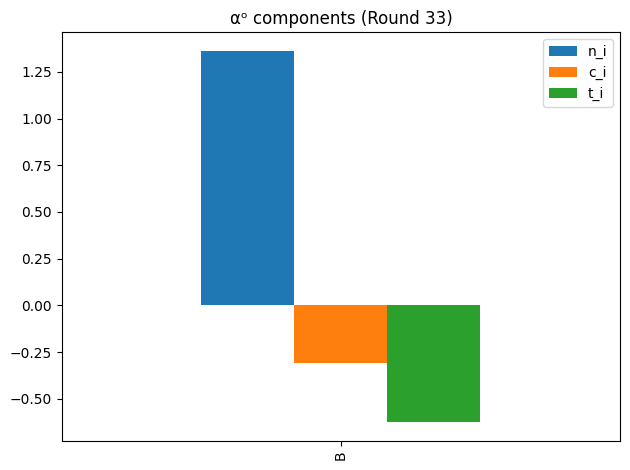

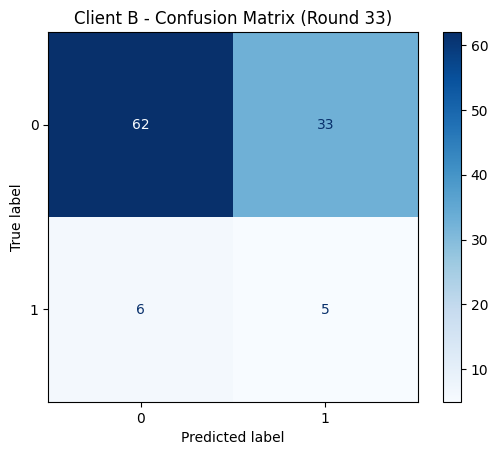


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9118    0.6526    0.7607        95
           1     0.1316    0.4545    0.2041        11

    accuracy                         0.6321       106
   macro avg     0.5217    0.5536    0.4824       106
weighted avg     0.8308    0.6321    0.7030       106


=== Round 34 ===
[Round 34] Global Accuracy: 0.6928 → 0.6437 | ΔW=1.5677

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2443


<Figure size 600x400 with 0 Axes>

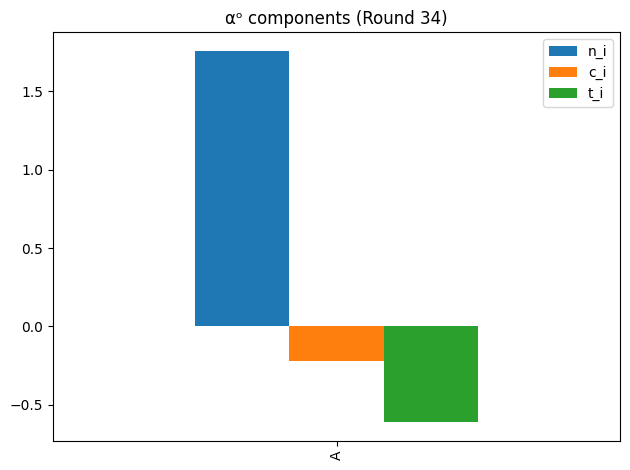

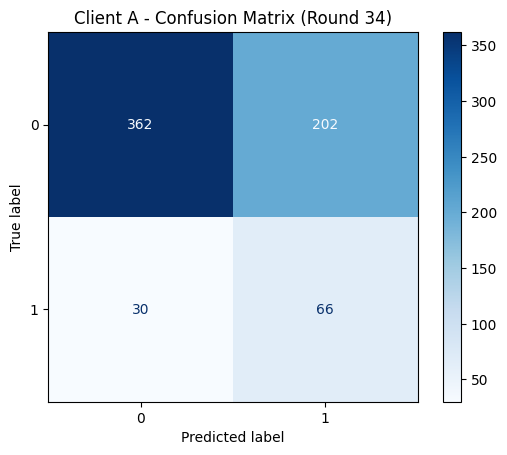


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9235    0.6418    0.7573       564
           1     0.2463    0.6875    0.3626        96

    accuracy                         0.6485       660
   macro avg     0.5849    0.6647    0.5600       660
weighted avg     0.8250    0.6485    0.6999       660


=== Round 35 ===
[Round 35] Global Accuracy: 0.6437 → 0.6131 | ΔW=1.0091

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2373
C  56.9649  0.4903  0.2768


<Figure size 600x400 with 0 Axes>

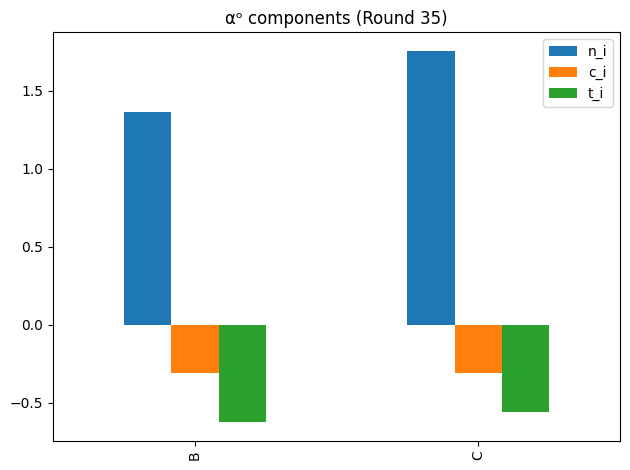

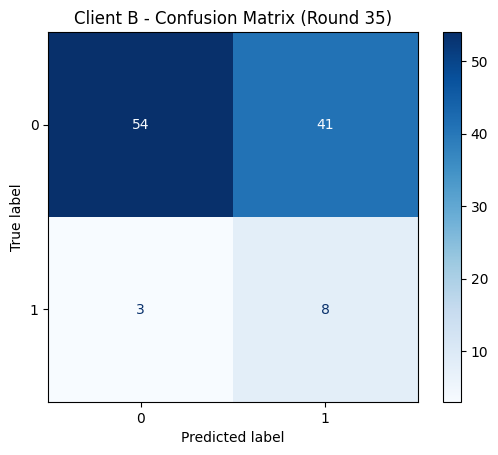


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9474    0.5684    0.7105        95
           1     0.1633    0.7273    0.2667        11

    accuracy                         0.5849       106
   macro avg     0.5553    0.6478    0.4886       106
weighted avg     0.8660    0.5849    0.6645       106



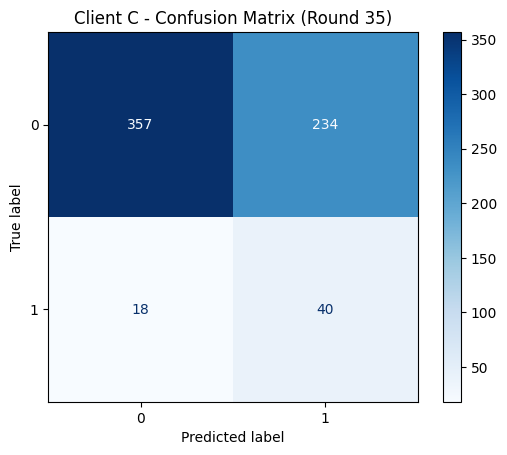


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9520    0.6041    0.7391       591
           1     0.1460    0.6897    0.2410        58

    accuracy                         0.6117       649
   macro avg     0.5490    0.6469    0.4900       649
weighted avg     0.8800    0.6117    0.6946       649


=== Round 36 ===
[Round 36] Global Accuracy: 0.6131 → 0.6483 | ΔW=1.1120

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2471


<Figure size 600x400 with 0 Axes>

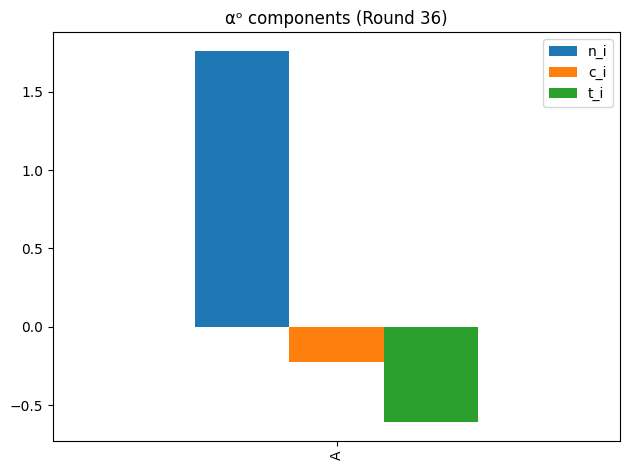

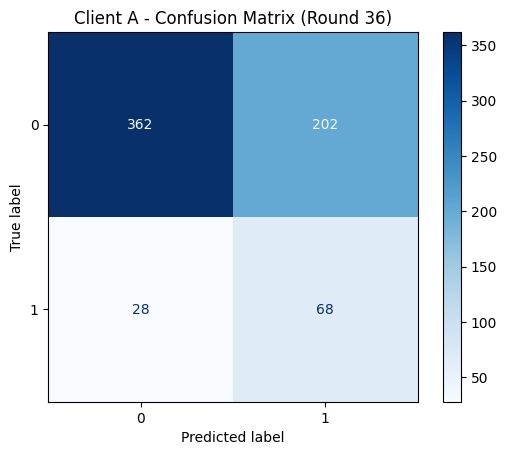


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9282    0.6418    0.7589       564
           1     0.2519    0.7083    0.3716        96

    accuracy                         0.6515       660
   macro avg     0.5900    0.6751    0.5652       660
weighted avg     0.8298    0.6515    0.7026       660


=== Round 37 ===
[Round 37] Global Accuracy: 0.6483 → 0.6019 | ΔW=0.8235

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2442
D  21.4476  0.4384  0.2733


<Figure size 600x400 with 0 Axes>

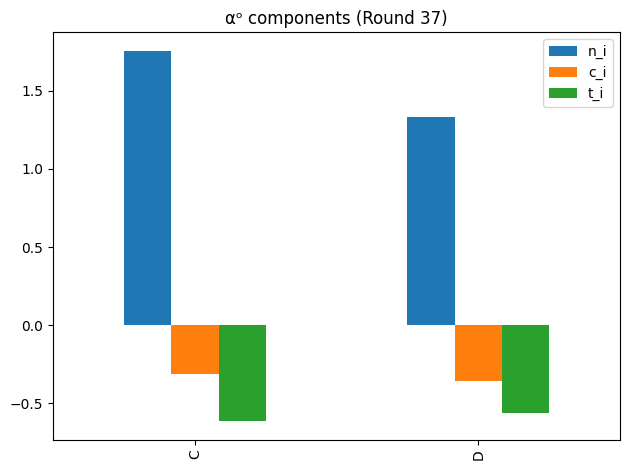

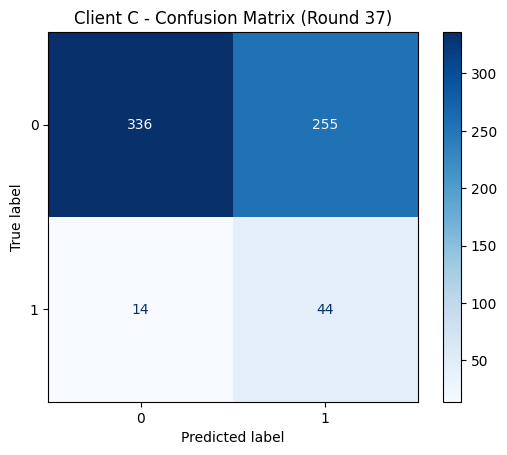


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9600    0.5685    0.7141       591
           1     0.1472    0.7586    0.2465        58

    accuracy                         0.5855       649
   macro avg     0.5536    0.6636    0.4803       649
weighted avg     0.8874    0.5855    0.6723       649



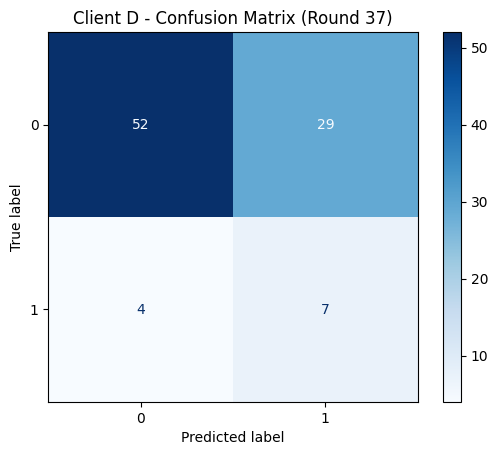


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9286    0.6420    0.7591        81
           1     0.1944    0.6364    0.2979        11

    accuracy                         0.6413        92
   macro avg     0.5615    0.6392    0.5285        92
weighted avg     0.8408    0.6413    0.7040        92


=== Round 38 ===
[Round 38] Global Accuracy: 0.6019 → 0.6330 | ΔW=1.4707

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2455


<Figure size 600x400 with 0 Axes>

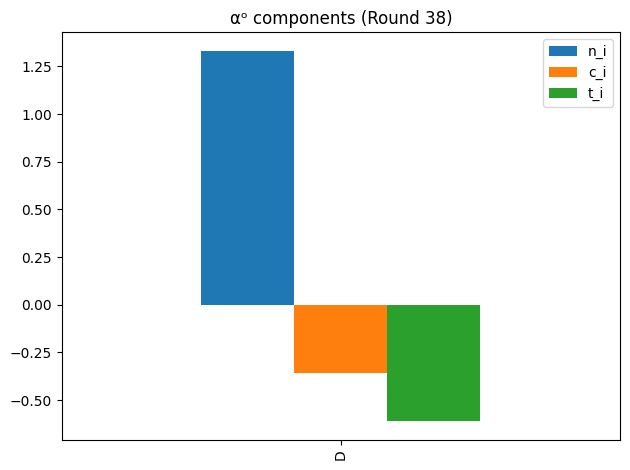

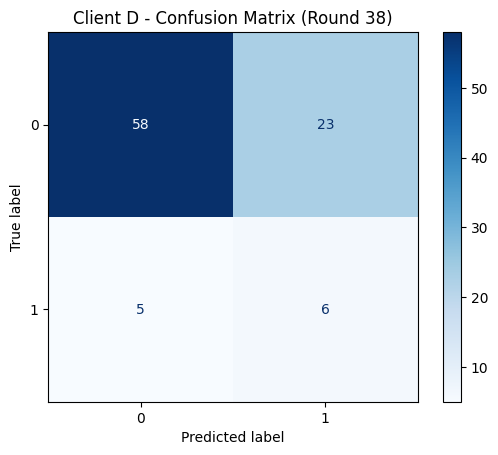


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9206    0.7160    0.8056        81
           1     0.2069    0.5455    0.3000        11

    accuracy                         0.6957        92
   macro avg     0.5638    0.6308    0.5528        92
weighted avg     0.8353    0.6957    0.7451        92


=== Round 39 ===
[Round 39] Global Accuracy: 0.6330 → 0.5435 | ΔW=1.2811

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2588


<Figure size 600x400 with 0 Axes>

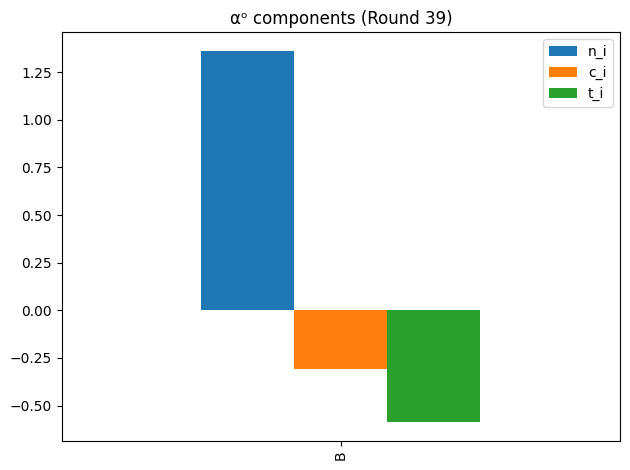

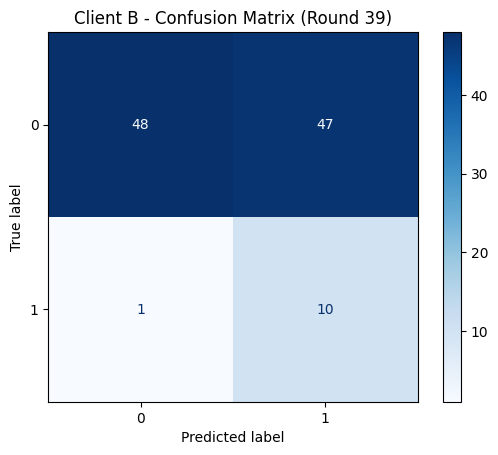


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9796    0.5053    0.6667        95
           1     0.1754    0.9091    0.2941        11

    accuracy                         0.5472       106
   macro avg     0.5775    0.7072    0.4804       106
weighted avg     0.8961    0.5472    0.6280       106


=== Round 40 ===
[Round 40] Global Accuracy: 0.5435 → 0.5959 | ΔW=0.8048

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2412


<Figure size 600x400 with 0 Axes>

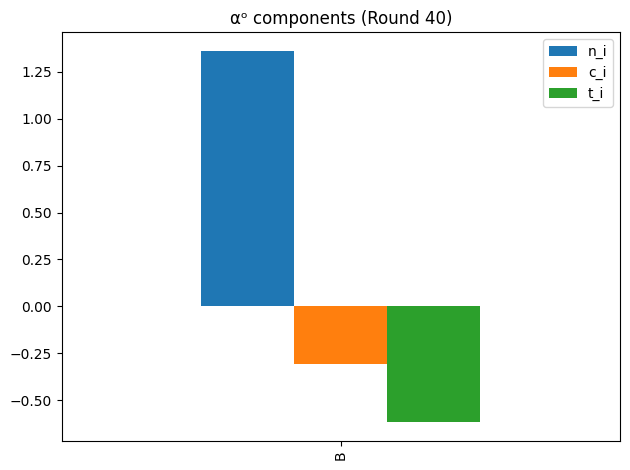

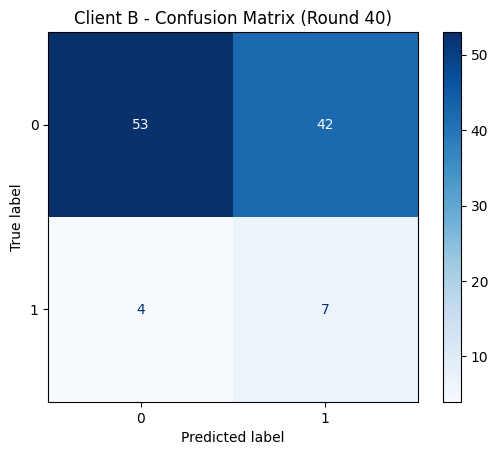


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9298    0.5579    0.6974        95
           1     0.1429    0.6364    0.2333        11

    accuracy                         0.5660       106
   macro avg     0.5363    0.5971    0.4654       106
weighted avg     0.8482    0.5660    0.6492       106


=== Round 41 ===
[Round 41] Global Accuracy: 0.5959 → 0.6145 | ΔW=0.9048

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2486


<Figure size 600x400 with 0 Axes>

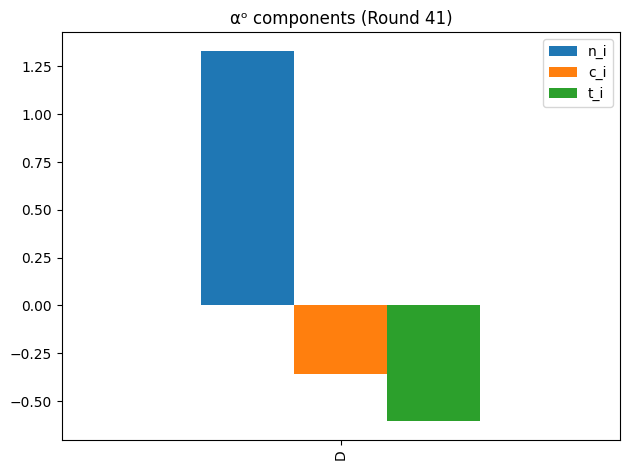

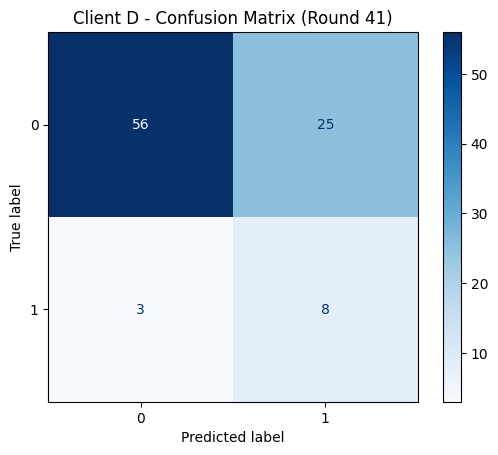


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9492    0.6914    0.8000        81
           1     0.2424    0.7273    0.3636        11

    accuracy                         0.6957        92
   macro avg     0.5958    0.7093    0.5818        92
weighted avg     0.8647    0.6957    0.7478        92


=== Round 42 ===
[Round 42] Global Accuracy: 0.6145 → 0.5720 | ΔW=2.0672

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2644
C  56.9649  0.4903  0.2586


<Figure size 600x400 with 0 Axes>

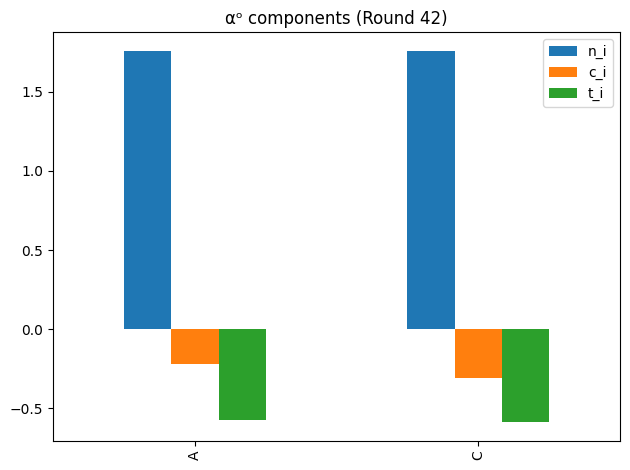

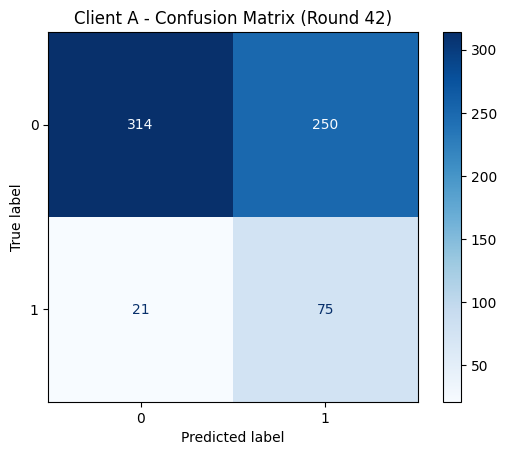


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9373    0.5567    0.6986       564
           1     0.2308    0.7812    0.3563        96

    accuracy                         0.5894       660
   macro avg     0.5840    0.6690    0.5274       660
weighted avg     0.8345    0.5894    0.6488       660



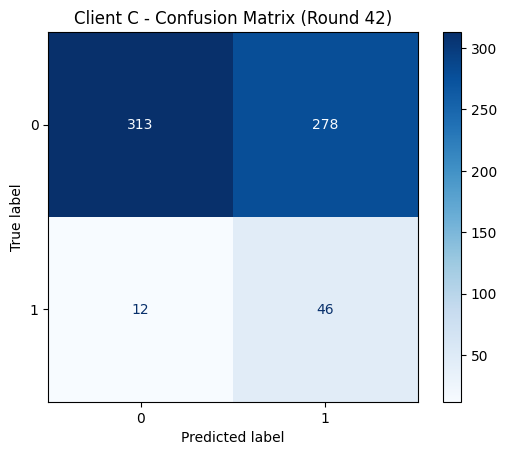


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9631    0.5296    0.6834       591
           1     0.1420    0.7931    0.2408        58

    accuracy                         0.5532       649
   macro avg     0.5525    0.6614    0.4621       649
weighted avg     0.8897    0.5532    0.6439       649


=== Round 43 ===
[Round 43] Global Accuracy: 0.5720 → 0.5999 | ΔW=1.4882

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2455


<Figure size 600x400 with 0 Axes>

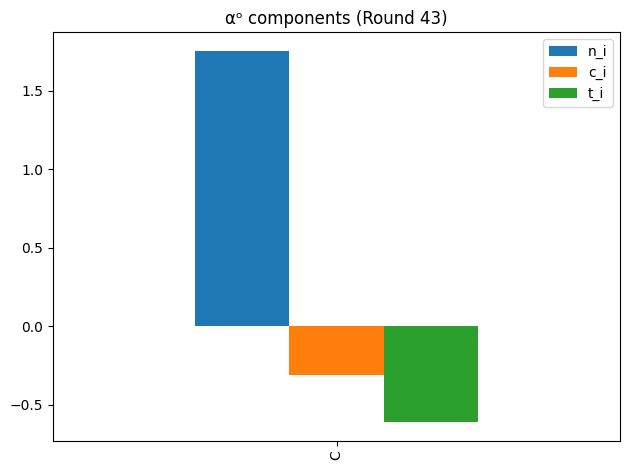

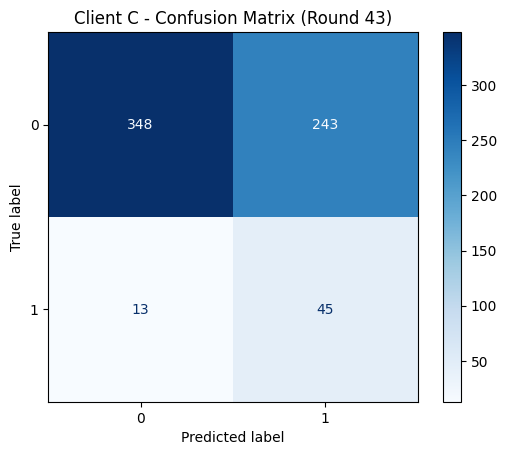


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9640    0.5888    0.7311       591
           1     0.1562    0.7759    0.2601        58

    accuracy                         0.6055       649
   macro avg     0.5601    0.6823    0.4956       649
weighted avg     0.8918    0.6055    0.6890       649


=== Round 44 ===
[Round 44] Global Accuracy: 0.5999 → 0.6151 | ΔW=1.5685

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
D  21.4476  0.4384  0.2529


<Figure size 600x400 with 0 Axes>

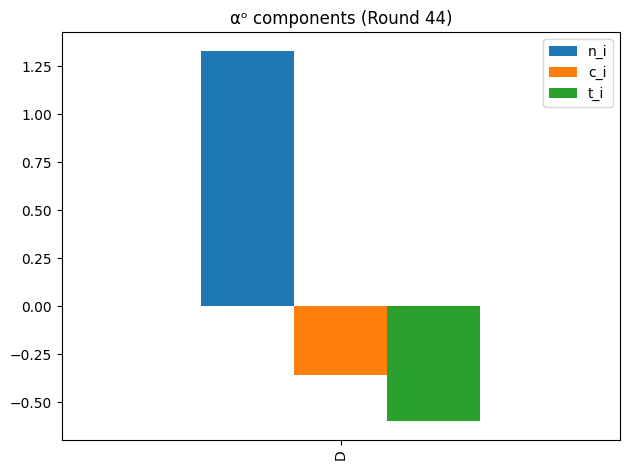

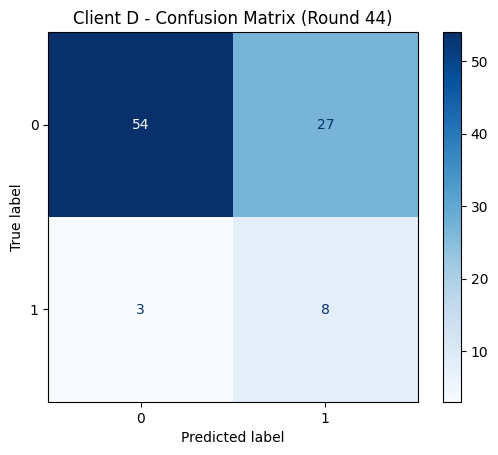


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9474    0.6667    0.7826        81
           1     0.2286    0.7273    0.3478        11

    accuracy                         0.6739        92
   macro avg     0.5880    0.6970    0.5652        92
weighted avg     0.8614    0.6739    0.7306        92


=== Round 45 ===
[Round 45] Global Accuracy: 0.6151 → 0.6284 | ΔW=1.2564

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2456
D  21.4476  0.4384  0.2398


<Figure size 600x400 with 0 Axes>

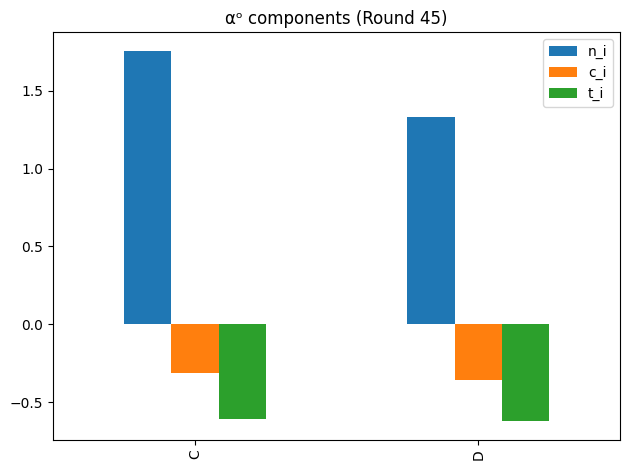

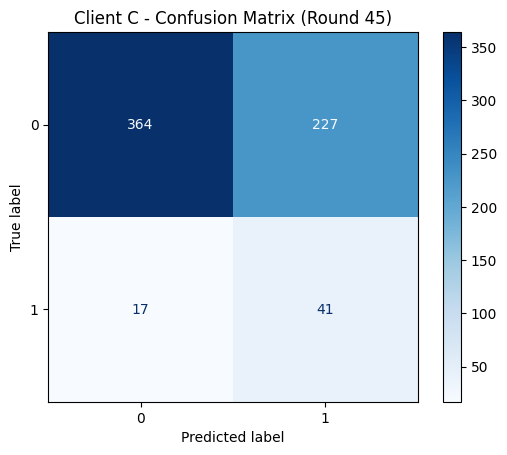


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9554    0.6159    0.7490       591
           1     0.1530    0.7069    0.2515        58

    accuracy                         0.6240       649
   macro avg     0.5542    0.6614    0.5003       649
weighted avg     0.8837    0.6240    0.7045       649



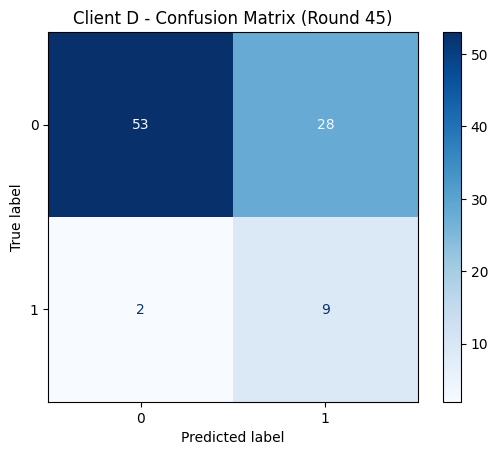


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9636    0.6543    0.7794        81
           1     0.2432    0.8182    0.3750        11

    accuracy                         0.6739        92
   macro avg     0.6034    0.7363    0.5772        92
weighted avg     0.8775    0.6739    0.7311        92


=== Round 46 ===
[Round 46] Global Accuracy: 0.6284 → 0.6536 | ΔW=1.7146

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
A  57.4456  0.6022  0.2558
D  21.4476  0.4384  0.2384


<Figure size 600x400 with 0 Axes>

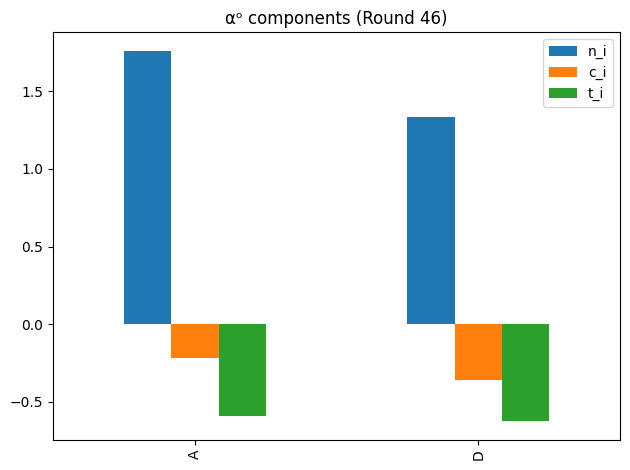

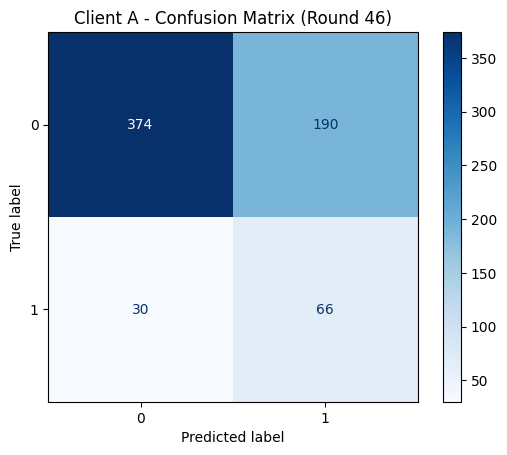


[Client A] Classification Report:
              precision    recall  f1-score   support

           0     0.9257    0.6631    0.7727       564
           1     0.2578    0.6875    0.3750        96

    accuracy                         0.6667       660
   macro avg     0.5918    0.6753    0.5739       660
weighted avg     0.8286    0.6667    0.7149       660



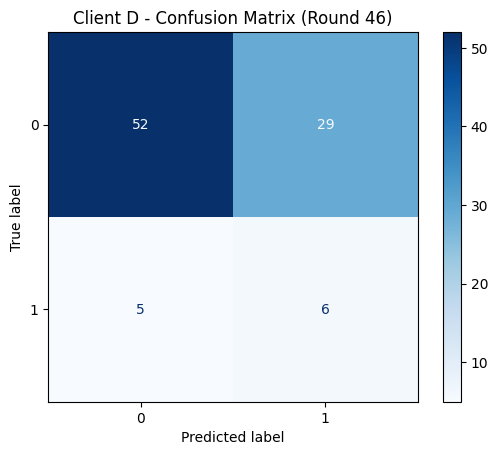


[Client D] Classification Report:
              precision    recall  f1-score   support

           0     0.9123    0.6420    0.7536        81
           1     0.1714    0.5455    0.2609        11

    accuracy                         0.6304        92
   macro avg     0.5419    0.5937    0.5072        92
weighted avg     0.8237    0.6304    0.6947        92


=== Round 47 ===
[Round 47] Global Accuracy: 0.6536 → 0.6357 | ΔW=1.1645

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
C  56.9649  0.4903  0.2456


<Figure size 600x400 with 0 Axes>

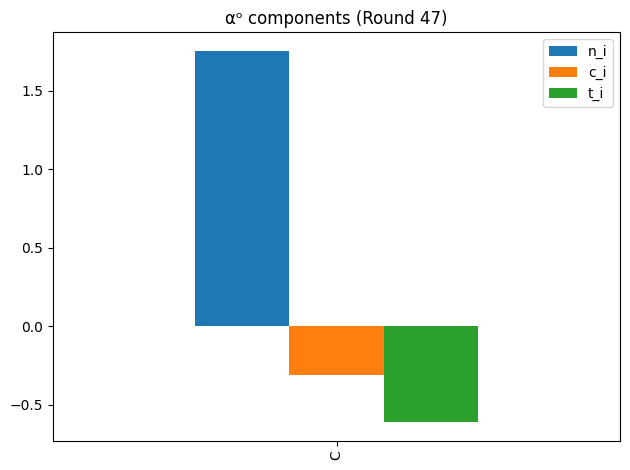

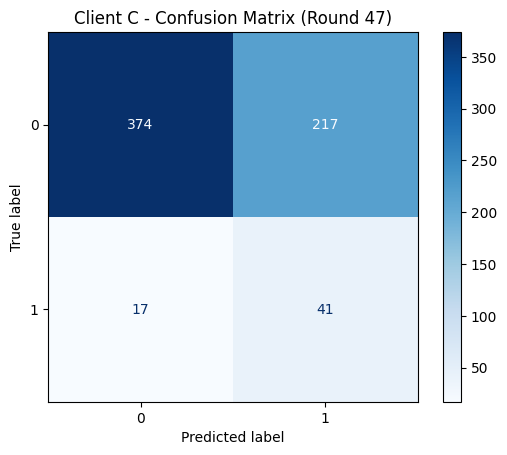


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9565    0.6328    0.7617       591
           1     0.1589    0.7069    0.2595        58

    accuracy                         0.6394       649
   macro avg     0.5577    0.6699    0.5106       649
weighted avg     0.8852    0.6394    0.7168       649


=== Round 48 ===
[Round 48] Global Accuracy: 0.6357 → 0.6218 | ΔW=2.0600

αᵒ 구성요소 (log scale):
       n_i     c_i    t_i
C  56.9649  0.4903  0.237


<Figure size 600x400 with 0 Axes>

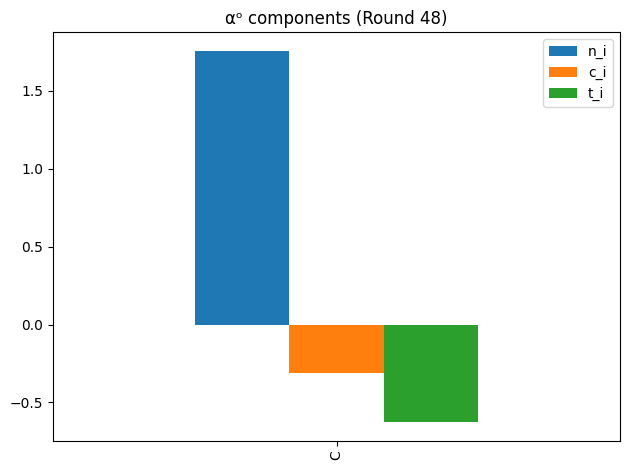

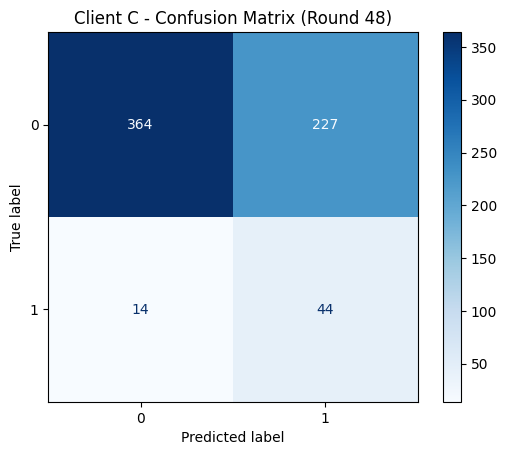


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9630    0.6159    0.7513       591
           1     0.1624    0.7586    0.2675        58

    accuracy                         0.6287       649
   macro avg     0.5627    0.6873    0.5094       649
weighted avg     0.8914    0.6287    0.7081       649


=== Round 49 ===
[Round 49] Global Accuracy: 0.6218 → 0.6463 | ΔW=1.0418

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2784


<Figure size 600x400 with 0 Axes>

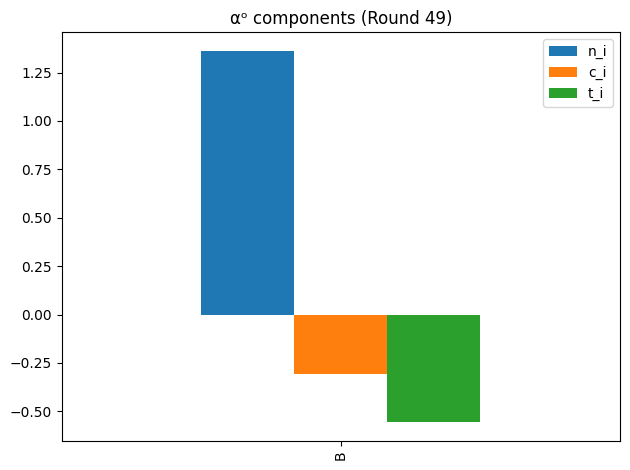

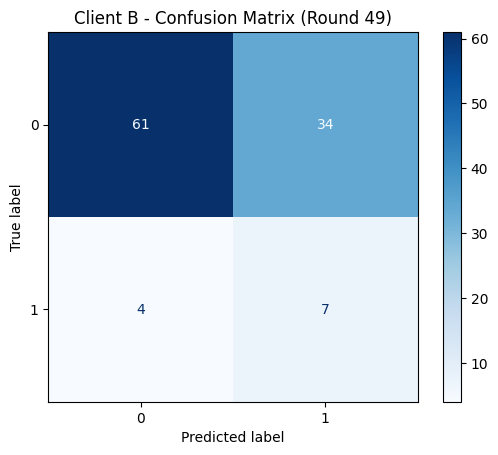


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9385    0.6421    0.7625        95
           1     0.1707    0.6364    0.2692        11

    accuracy                         0.6415       106
   macro avg     0.5546    0.6392    0.5159       106
weighted avg     0.8588    0.6415    0.7113       106


=== Round 50 ===
[Round 50] Global Accuracy: 0.6463 → 0.6821 | ΔW=1.6361

αᵒ 구성요소 (log scale):
       n_i     c_i     t_i
B  23.0217  0.4905  0.2398
C  56.9649  0.4903  0.2456


<Figure size 600x400 with 0 Axes>

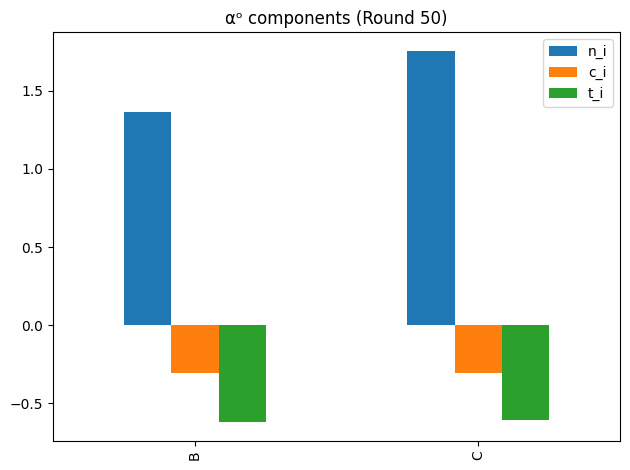

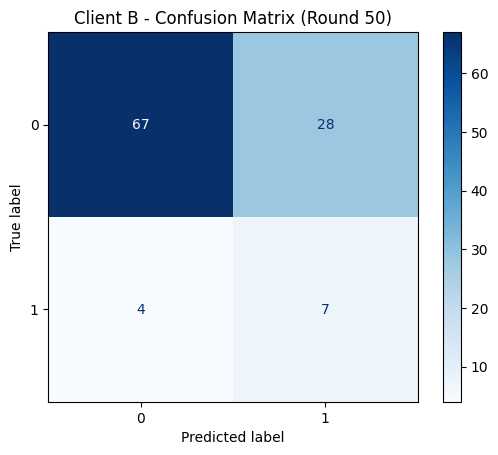


[Client B] Classification Report:
              precision    recall  f1-score   support

           0     0.9437    0.7053    0.8072        95
           1     0.2000    0.6364    0.3043        11

    accuracy                         0.6981       106
   macro avg     0.5718    0.6708    0.5558       106
weighted avg     0.8665    0.6981    0.7550       106



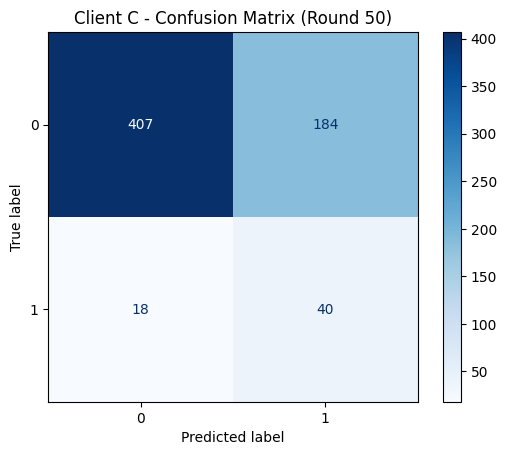


[Client C] Classification Report:
              precision    recall  f1-score   support

           0     0.9576    0.6887    0.8012       591
           1     0.1786    0.6897    0.2837        58

    accuracy                         0.6888       649
   macro avg     0.5681    0.6892    0.5424       649
weighted avg     0.8880    0.6888    0.7549       649



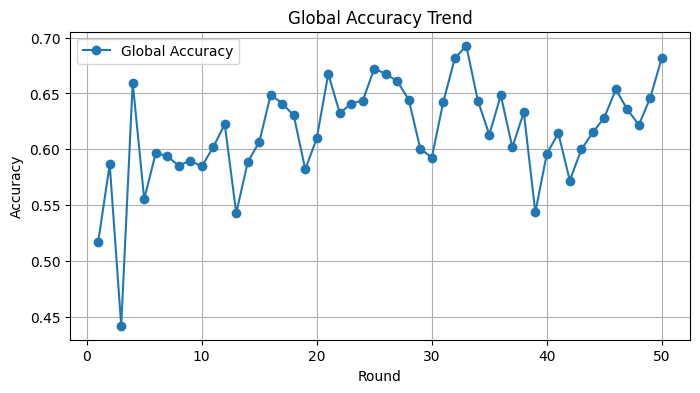

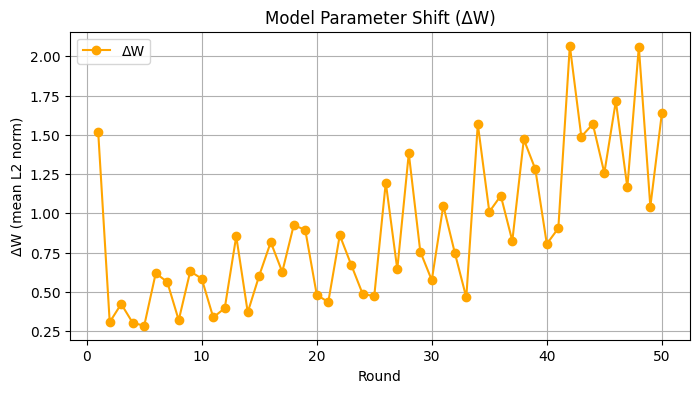


[최종 파라미터 통계 요약]
net.0.weight: mean=0.004509, std=0.152922
net.0.bias: mean=-0.007919, std=0.144854
net.1.weight: mean=1.062858, std=0.099319
net.1.bias: mean=-0.092654, std=0.078994
net.1.running_mean: mean=-0.006666, std=0.145474
net.1.running_var: mean=0.188998, std=0.222344
net.1.num_batches_tracked: dtype=torch.int64 (skip)
net.4.weight: mean=0.031590, std=0.091008
net.4.bias: mean=-0.002184, std=0.050695
net.5.weight: mean=1.060926, std=0.066184
net.5.bias: mean=-0.049909, std=0.061500
net.5.running_mean: mean=1.595820, std=1.513591
net.5.running_var: mean=3.360884, std=2.025345
net.5.num_batches_tracked: dtype=torch.int64 (skip)
net.8.weight: mean=0.027696, std=0.096386
net.8.bias: mean=0.007092, std=0.049430
net.9.weight: mean=0.975755, std=0.079801
net.9.bias: mean=-0.111238, std=0.058995
net.9.running_mean: mean=1.445448, std=2.291527
net.9.running_var: mean=17.306614, std=20.800318
net.9.num_batches_tracked: dtype=torch.int64 (skip)
net.12.weight: mean=0.009367, std=0.102491

In [ ]:
# -*- coding: utf-8 -*-
# Federated Learning with Participation (tᵒ), Label (cᵒ), Size (nᵒ) Mitigation
# cᵒ = (kᵒ/K) × max(Hᵒ, ε·logK) / logK

import os, math, copy, random, argparse
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ------------------------------------------------
# 0) 결함 라벨 정의
# ------------------------------------------------
DEFECT_LABELS = ['Short_Shot_1','Bubble_1','Exfoliation_1','Blow_Hole_1','Deformation_1']

# ------------------------------------------------
# 1) 데이터 로드 및 3-way split
# ------------------------------------------------
def load_excel_binary(path: str):
    df = pd.read_excel(path).dropna(axis=1, how='all')
    for col in DEFECT_LABELS:
        if col not in df.columns:
            df[col] = 0
    y = df[DEFECT_LABELS].sum(axis=1).clip(upper=1).astype(int).values
    X = df.drop(columns=DEFECT_LABELS, errors='ignore')
    X = X.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return X, y

def build_clients(path_map):
    raw = {}
    for cid, path in path_map.items():
        X, y = load_excel_binary(path)
        raw[cid] = {"X": X, "y": y}

    # 공통 컬럼 교집합만 사용
    cols = set.intersection(*[set(v["X"].columns) for v in raw.values()])
    clients, metas = {}, {}
    for cid, v in raw.items():
        feat = v["X"][list(cols)].copy()
        mu, sigma = feat.mean(), feat.std().replace(0, 1)
        feat = (feat - mu) / sigma
        X = torch.tensor(feat.values.astype(np.float32))
        y = torch.tensor(v["y"], dtype=torch.long)
        allset = TensorDataset(X, y)

        n = len(allset)
        n_train, n_val = int(0.6 * n), int(0.2 * n)
        n_test = n - n_train - n_val
        tr, va, te = random_split(allset, [n_train, n_val, n_test],
                                  generator=torch.Generator().manual_seed(42))
        clients[cid] = {"train": tr, "val": va, "test": te, "all": allset}
        metas[cid] = {"n_samples": len(y),
                      "class_counts": pd.Series(v["y"]).value_counts().to_dict()}
    return clients, metas, list(cols)

# ------------------------------------------------
# 2) Deep MLP (Improved)
# ------------------------------------------------
class DeepMLP(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# ================================================================
# 3) Mitigation Functions (tᵒ, cᵒ, nᵒ)
# ================================================================
def compute_ti(round_now, last_round, T_window=20, theta_time=0.5):
    """Participation Skew 완화"""
    if last_round is None:
        delta = T_window
    else:
        delta = min(max(0, round_now - last_round), T_window)
    return 1.0 + theta_time * (delta / max(1, T_window))

def compute_ci(class_counts, eps_frac=0.05, min_samples=1):
    """Label Skew 완화"""
    K = len(class_counts)
    total = sum(class_counts.values())
    if K == 0 or total == 0:
        return 1e-8
    H = 0.0
    for c in class_counts.values():
        if c > 0:
            p = c / total
            H -= p * math.log(p)
    logK = math.log(K + 1e-12)
    H_floor = eps_frac * logK
    H_tilde = max(H, H_floor)
    k_i = sum(1 for c in class_counts.values() if c >= min_samples)
    frac_k = k_i / K
    ci = max(1e-8, frac_k * (H_tilde / logK))
    return ci

def aggregate_with_softmax_weights(state_dicts, alpha_components,
                                   rho=1.0, beta=0.7, theta=0.5):
    """
    Softmax 기반 집계
    αᵢ = exp(log(nᵢ^ρ·cᵢ^β·tᵢ^θ)) / Σⱼ exp(log(nⱼ^ρ·cⱼ^β·tⱼ^θ))

    log() 사용 이유:
      1️ overflow 방지 (scale 안정화)
      2️ 곱셈을 덧셈 구조로 선형화 (ρlogn + βlogc + θlogt)
      3️ softmax(log-sum-exp) 안정화
      4️ 비율 기반 scale invariance 확보
    """
    if not state_dicts:
        return None

    logits = {}
    for cid, comp in alpha_components.items():
        log_weight = (
            math.log(comp["n_i"] ** rho + 1e-12)
            + math.log(comp["c_i"] ** beta + 1e-12)
            + math.log(comp["t_i"] ** theta + 1e-12)
        )
        logits[cid] = log_weight

    # softmax 안정화
    max_logit = max(logits.values())
    exp_logits = {cid: math.exp(logits[cid] - max_logit) for cid in logits}
    total_exp = sum(exp_logits.values())
    alphas = {cid: exp_logits[cid] / total_exp for cid in logits}

    # weighted aggregation
    global_sd = None
    for cid, sd in state_dicts.items():
        w = alphas[cid]
        if global_sd is None:
            global_sd = {k: v.clone() * w for k, v in sd.items()}
        else:
            for k in global_sd:
                global_sd[k] += sd[k] * w
    return global_sd

# ------------------------------------------------
# 4) Local Training & Evaluation
# ------------------------------------------------
def local_train(model, dataset, lr, epochs, device, class_counts):
    model = copy.deepcopy(model).to(device)
    model.train()

    total = sum(class_counts.values())
    w_0 = total / (2 * class_counts.get(0, 1))
    w_1 = total / (2 * class_counts.get(1, 1))
    class_weights = torch.tensor([w_0, w_1], dtype=torch.float32).to(device)

    crit = nn.CrossEntropyLoss(weight=class_weights)
    opt = optim.Adam(model.parameters(), lr=lr)  # ✅ Adam으로 변경
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    for _ in range(epochs):
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad()
            loss = crit(model(x), y)
            loss.backward()
            opt.step()

    return model.state_dict()

def evaluate(model, dataset, device, return_preds=False):
    model.eval()
    loader = DataLoader(dataset, batch_size=256)
    correct, total = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            pred = model(x).argmax(1)
            correct += pred.eq(y).sum().item()
            total += len(y)
            if return_preds:
                y_true += y.cpu().tolist()
                y_pred += pred.cpu().tolist()

    acc = correct / total if total > 0 else 0.0
    if return_preds:
        return acc, y_true, y_pred
    return acc

# ------------------------------------------------
# 5) 메인 루프
# ------------------------------------------------
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--rounds", type=int, default=50)   # 기본값 50으로 확장
    args, _ = parser.parse_known_args()

    paths = {"A": "A.xlsx", "B": "B.xlsx", "C": "C.xlsx", "D": "D.xlsx"}
    clients, metas, cols = build_clients(paths)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    input_dim = clients["A"]["all"].tensors[0].shape[1]
    global_model = DeepMLP(input_dim=input_dim).to(device)

    last_round = {cid: None for cid in clients}
    combined_test = torch.utils.data.ConcatDataset([v["test"] for v in clients.values()])
    prev_global = copy.deepcopy(global_model.state_dict())

    # 수렴 추세 저장
    round_log = {"round": [], "acc": [], "dW": []}

    for rnd in range(1, args.rounds + 1):
        print(f"\n=== Round {rnd} ===")

        probs = {cid: compute_ti(rnd, last_round[cid]) for cid in clients}
        total_p = sum(probs.values())
        probs = {k: v / total_p for k, v in probs.items()}
        selected = [cid for cid in clients if random.random() < probs[cid]]
        if len(selected) == 0:
            selected = [random.choice(list(clients.keys()))]

        state_dicts, alpha_components = {}, {}
        before_acc = evaluate(global_model, combined_test, device)

        for cid in selected:
            ds = clients[cid]["train"]
            labels = [int(y) for _, y in ds]
            class_counts = pd.Series(labels).value_counts().to_dict()

            state_dict = local_train(global_model, ds, lr=0.001, epochs=5,
                                     device=device, class_counts=class_counts)
            state_dicts[cid] = state_dict

            n_i = math.sqrt(metas[cid]["n_samples"])
            c_i = compute_ci(class_counts)
            t_i = probs[cid]
            alpha_components[cid] = {"n_i": n_i, "c_i": c_i, "t_i": t_i}
            last_round[cid] = rnd

        new_global = aggregate_with_softmax_weights(state_dicts, alpha_components)
        if new_global is None:
            continue
        global_model.load_state_dict(new_global)

        after_acc, y_true, y_pred = evaluate(global_model, combined_test, device, return_preds=True)

        # 안정화된 ΔW 계산 (평균 L2 norm)
        dW, count = 0.0, 0
        for k in global_model.state_dict().keys():
            if global_model.state_dict()[k].dtype in (torch.float32, torch.float64):
                diff = global_model.state_dict()[k] - prev_global[k]
                dW += torch.norm(diff).item()
                count += 1
        dW /= max(1, count)
        prev_global = copy.deepcopy(global_model.state_dict())

        print(f"[Round {rnd}] Global Accuracy: {before_acc:.4f} → {after_acc:.4f} | ΔW={dW:.4f}")
        round_log["round"].append(rnd)
        round_log["acc"].append(after_acc)
        round_log["dW"].append(dW)

        df = pd.DataFrame(alpha_components).T.round(4)
        print("\nαᵒ 구성요소 (log scale):")
        print(df)
        plt.figure(figsize=(6, 4))
        np.log10(df + 1e-8).plot(kind="bar")
        plt.title(f"αᵒ components (Round {rnd})")
        plt.tight_layout()
        plt.show()

        for cid in selected:
            _, yt, yp = evaluate(global_model, clients[cid]["test"], device, return_preds=True)
            cm = confusion_matrix(yt, yp)
            ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
            plt.title(f"Client {cid} - Confusion Matrix (Round {rnd})")
            plt.show()
            print(f"\n[Client {cid}] Classification Report:")
            print(classification_report(yt, yp, digits=4))

    # ------------------------------------------------
    # 6) 수렴 시각화 및 파라미터 통계
    # ------------------------------------------------
    plt.figure(figsize=(8, 4))
    plt.plot(round_log["round"], round_log["acc"], marker="o", label="Global Accuracy")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.title("Global Accuracy Trend")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(round_log["round"], round_log["dW"], marker="o", color="orange", label="ΔW")
    plt.xlabel("Round")
    plt.ylabel("ΔW (mean L2 norm)")
    plt.title("Model Parameter Shift (ΔW)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n[최종 파라미터 통계 요약]")
    for name, param in global_model.state_dict().items():
        if param.dtype in (torch.float32, torch.float64):
            print(f"{name}: mean={param.mean():.6f}, std={param.std():.6f}")
        else:
            print(f"{name}: dtype={param.dtype} (skip)")


- | Client | 평균 nᵢ | 평균 cᵢ | 평균 tᵢ (참여도) | 해석                       |
| ------ | ----- | ----- | ----------- | ------------------------ |
| **A**  | ~57.4 | 0.60  | 0.24~0.27   | 대형 클라이언트 (데이터 많고 다양도 높음) |
| **B**  | ~23.0 | 0.49  | 0.23~0.27   | 중간 규모, 일정 주기로 참여         |
| **C**  | ~56.9 | 0.49  | 0.23~0.25   | 대형 but 라벨 다양도 낮음         |
| **D**  | ~21.4 | 0.43  | 0.24~0.27   | 소형 클라이언트, 불균형 완화 효과 존재   |
